In [1]:
import numpy as np
import pandas as pd 
import ROOT 

unfolded_spectra_names = ["unfolded_{}_Iteration{}".format(method,i) for method in ["area","mult","dnn","snn"] for i in range(2,9)]
unfolded_over_truth_names = ["{}_unfolded_over_truth_Iteration{}".format(method,i) for method in ["area","mult","dnn","snn"] for i in range(2,9)]
pearson_matrix_names = ["{}_pearson_Iteration{}".format(method,i) for method in ["area","mult","dnn","snn"] for i in range(2,9)]
covariance_matrix_names = ["{}_covariance_Iteration{}".format(method,i) for method in ["area","mult","dnn","snn"] for i in range(2,9)]
measurement_over_truth_names = ["{}_measurement_over_truth".format(method) for method in ['area','mult','dnn','snn']]
area_measurement_over_truth_normalized_names = ["{}_measurement_over_truth_normalized".format(method) for method in ['area','mult','dnn','snn']]
measurement_names = ["measurement_{}_reco".format(method) for method in ['area','mult','dnn','snn']]

truth_name = ["h_truth"]
TH2D_names = pearson_matrix_names+covariance_matrix_names
TH1D_names = unfolded_spectra_names + unfolded_over_truth_names + measurement_over_truth_names + measurement_names + truth_name + area_measurement_over_truth_normalized_names

def TH1toMatplot(hist):
    x = np.array([hist.GetBinCenter(i) for i in range(1,hist.GetNbinsX()+1)])
    x_err = np.array([hist.GetBinWidth(i)/2 for i in range(1,hist.GetNbinsX()+1)])
    y = np.array([hist.GetBinContent(i) for i in range(1,hist.GetNbinsX()+1)])
    y_err = np.array([hist.GetBinError(i) for i in range(1,hist.GetNbinsX()+1)])
    return [x,x_err],[y,y_err]

def GetHistoDictionary(datasets=["AuAu_R02","AuAu_R04","AuAu_R06","PbPb_R02","PbPb_R04","PbPb_R06"],
                       filebase= '/lustre/isaac/scratch/tmengel/jet-background-subtraction/unfold/results/'
                       ):
    histos = {}
    for ds in datasets:
        filename = filebase + '{}/unfolding_output.root'.format(ds)
        file = ROOT.TFile(filename)
        
        th1ds = {}
        for name in TH1D_names:
            # print(name)
            th1d = file.Get(name)
            x = np.array([th1d.GetBinCenter(i) for i in range(1,th1d.GetNbinsX()+1)])
            x_err = np.array([th1d.GetBinWidth(i)/2 for i in range(1,th1d.GetNbinsX()+1)])
            y = np.array([th1d.GetBinContent(i) for i in range(1,th1d.GetNbinsX()+1)])
            y_err = np.array([th1d.GetBinError(i) for i in range(1,th1d.GetNbinsX()+1)])
            X = [x,x_err]
            Y = [y,y_err]
            th1ds[name] = {'x': X[0], 'x_err': X[1], 'y': Y[0], 'y_err': Y[1]}
            
        th2ds = {}
        for name in TH2D_names:
            th2d = file.Get(name)
            xbins = np.array([th2d.GetXaxis().GetBinLowEdge(i) for i in range(1,th2d.GetNbinsX()+1)])
            ybins = np.array([th2d.GetYaxis().GetBinLowEdge(i) for i in range(1,th2d.GetNbinsY()+1)])
            values = []
            value_errors = []
            for i in range(1,th2d.GetNbinsX()+1):
                tmpvalues = []
                tmpvalue_errors = []
                for j in range(1,th2d.GetNbinsY()+1):
                    tmpvalues.append(th2d.GetBinContent(i,j))
                    tmpvalue_errors.append(th2d.GetBinError(i,j))
                values.append(tmpvalues)
                value_errors.append(tmpvalue_errors)
            values = np.array(values)
            value_errors = np.array(value_errors)  
            # values = np.array([th2d.GetBinContent(i,j) for i in range(1,th2d.GetNbinsX()+1) for j in range(1,th2d.GetNbinsY()+1)])
            # value_errors = np.array([th2d.GetBinError(i,j) for i in range(1,th2d.GetNbinsX()+1) for j in range(1,th2d.GetNbinsY()+1)])
            th2ds[name] = {'xbins': xbins, 'ybins': ybins, 'values': values, 'value_errors': value_errors}
            
        histos[ds] = {'th1ds': th1ds, 'th2ds': th2ds}
        
    return histos

def GetChi2Dictionary(datasets=["AuAu_R02","AuAu_R04","AuAu_R06","PbPb_R02","PbPb_R04","PbPb_R06"],
                       filebase= '/lustre/isaac/scratch/tmengel/jet-background-subtraction/unfold/results/'
                       ):
    chi2s = {}
    for ds in datasets:
        filename = filebase + '{}/unfolding_output.root'.format(ds)
        rdf = ROOT.RDataFrame("tree",filename).AsNumpy()
        chi2s_ds = {}
        for key in rdf.keys():
            chi2s_ds[key] = rdf[key]
        chi2s[ds] = chi2s_ds
    return chi2s
         
chi2 = GetChi2Dictionary()   
histograms = GetHistoDictionary() 

Welcome to JupyROOT 6.26/02


In [2]:
import paperstyle as ps
import matplotlib.pyplot as plt

fig_size = ps.GetFigSize(510.0, 1.7)
plt.rcParams.update(ps.style)
plt.rcParams.update({'figure.figsize': fig_size})
params = {'axes.labelsize': 18,
            'axes.linewidth' : 1.5,
            'font.size': 18,
            'font.family': 'Times New Roman',
            'mathtext.fontset': 'stix',
            'legend.fontsize': 20,
            'xtick.labelsize': 18,
            'ytick.labelsize': 20,
            'text.usetex': False,
            'lines.linewidth': 1,
            'lines.linestyle': ' ',
            'lines.markersize' : 6,
            'lines.markeredgewidth' : 1,
            'xtick.major.size' : 5,
            'xtick.minor.size' : 3,
            'xtick.major.width' : 2,
            'xtick.minor.width' : 1,
            'xtick.direction' : 'in',
            'ytick.major.size' : 5,
            'ytick.minor.size' : 3,
            'ytick.major.width' : 2,
            'ytick.minor.width' : 1,
            'ytick.direction' : 'in',
            'xtick.minor.visible' : True,
            'ytick.minor.visible' : True,
            'figure.figsize': (8,6),
            'savefig.transparent': True,
            'errorbar.capsize': 1.5,
            }
plt.rcParams.update(params)

12 0
100 1
100 2
50 3
1 4


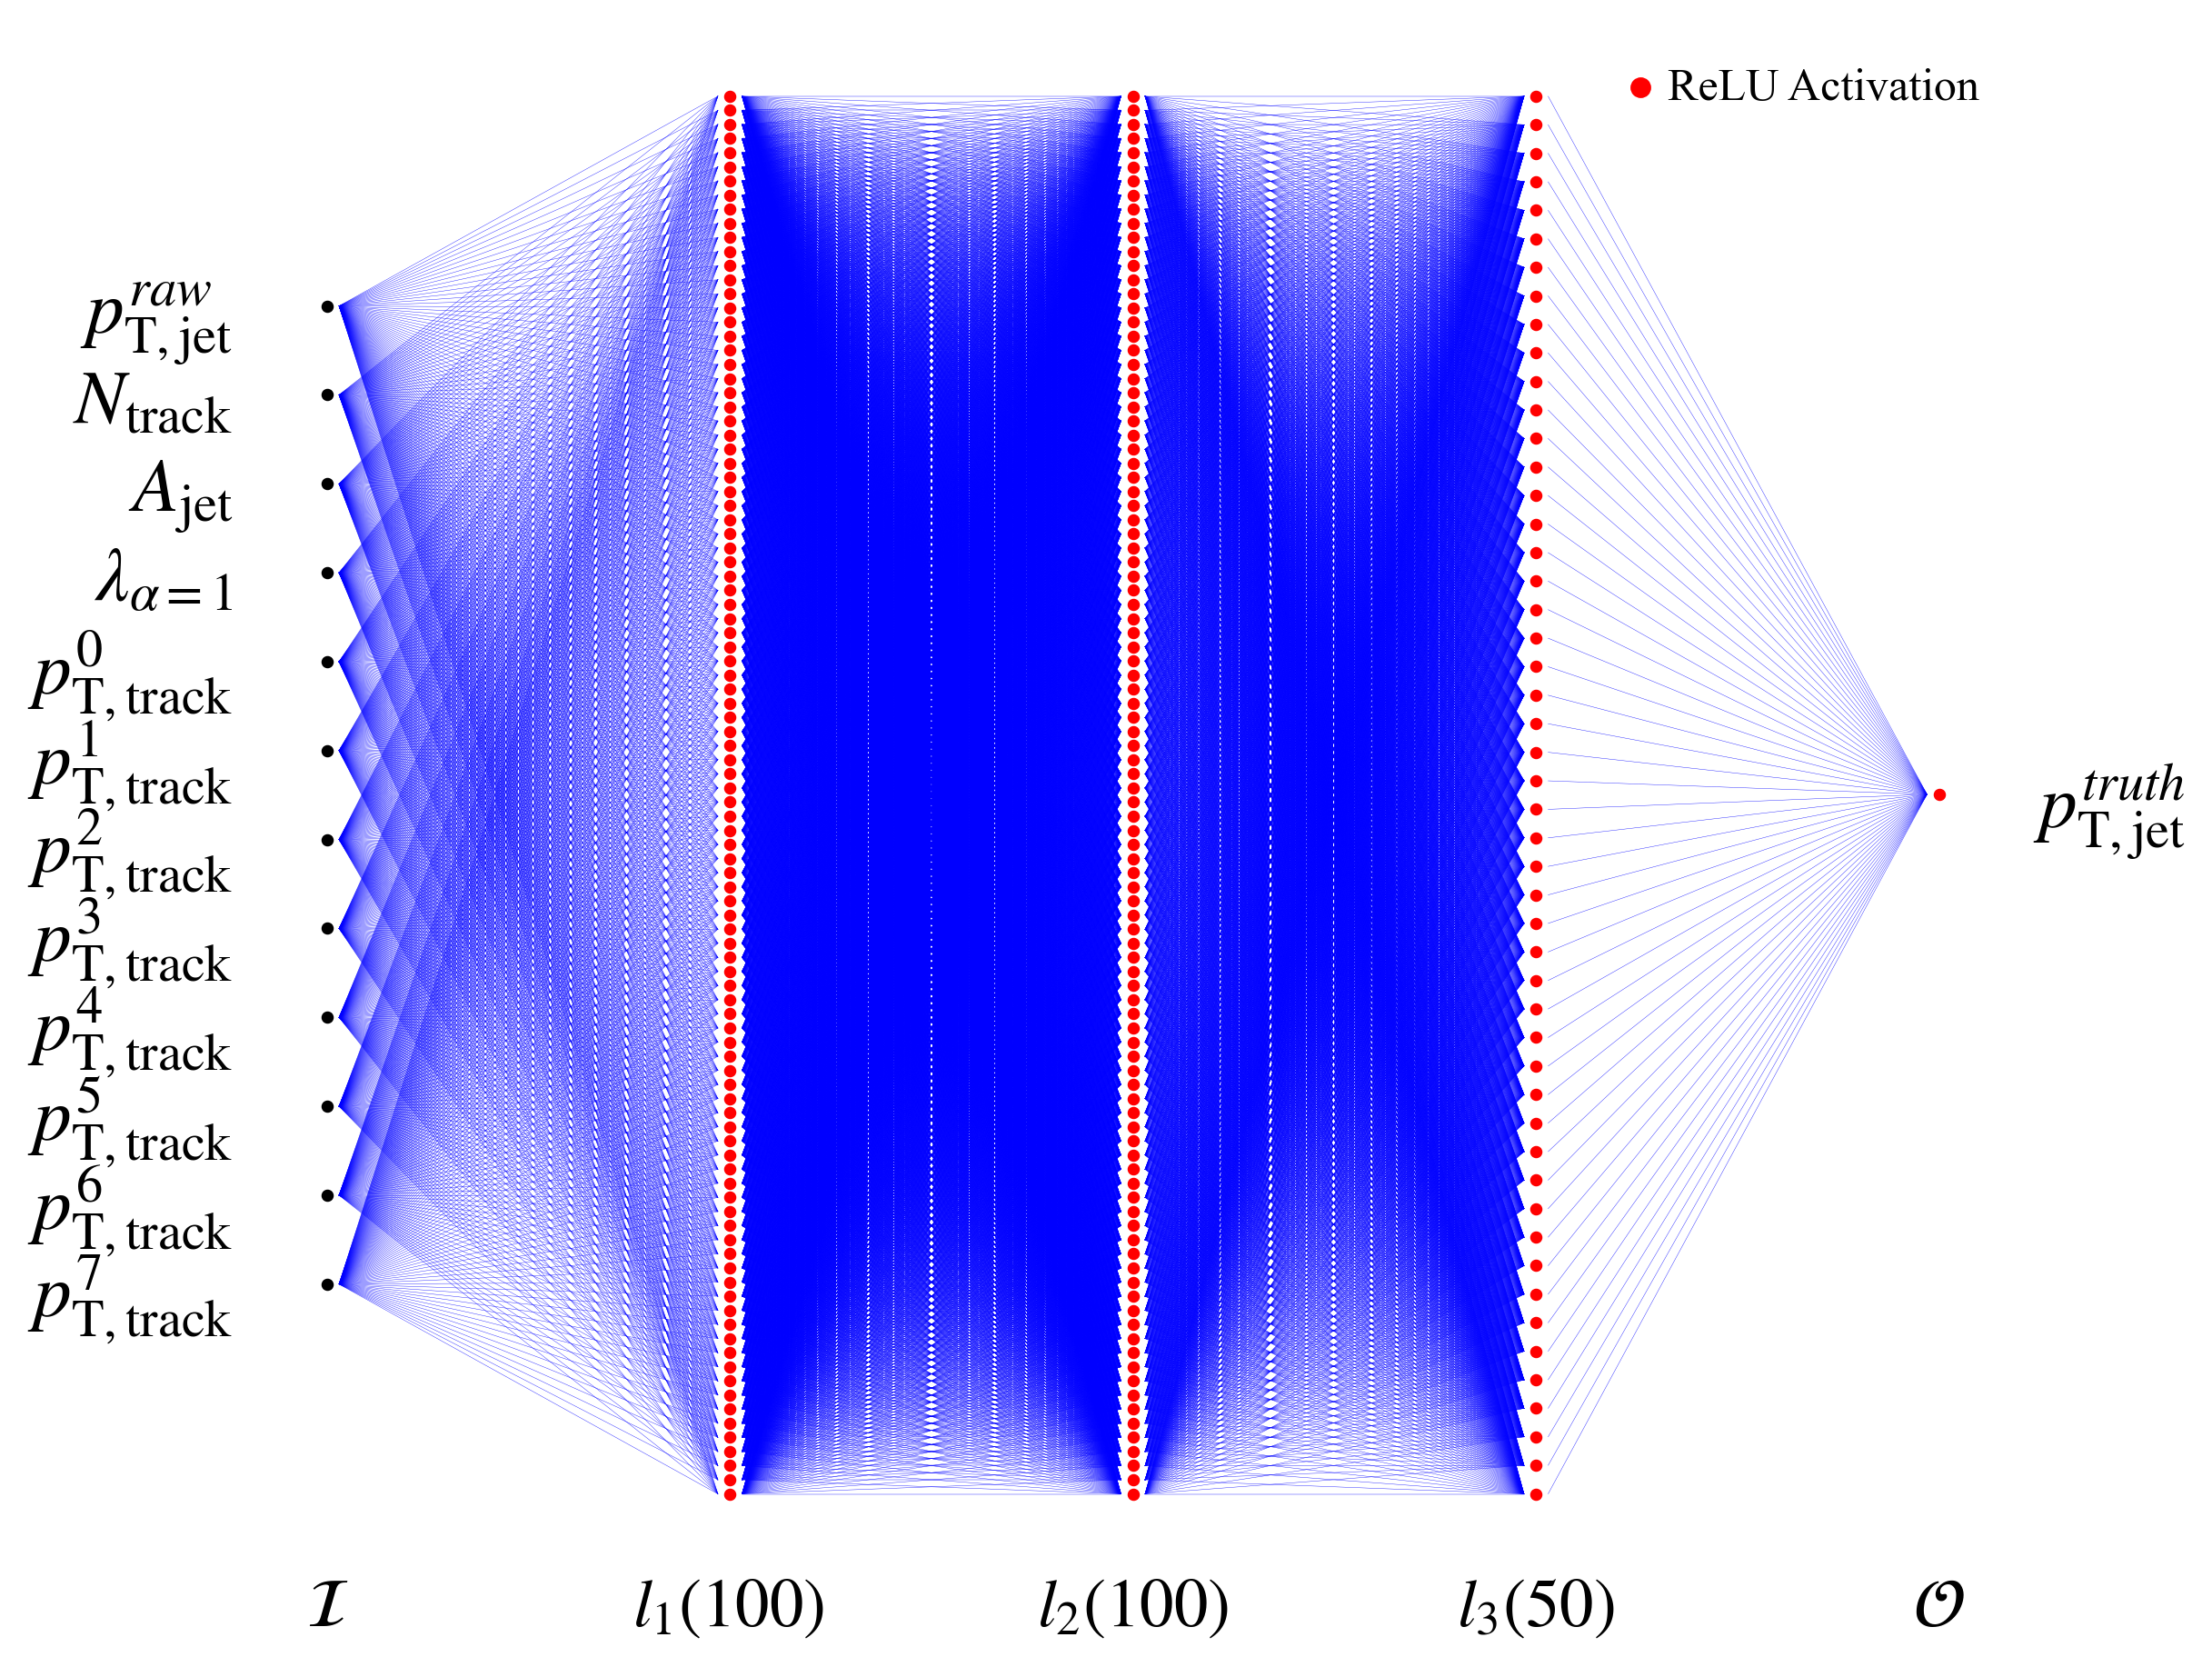

In [35]:
import paperstyle as ps
import matplotlib.pyplot as plt

fig_size = ps.GetFigSize(510.0, 1.7)
plt.rcParams.update(ps.style)
plt.rcParams.update({'figure.figsize': fig_size})
params = {'axes.labelsize': 18,
            'axes.linewidth' : 1.5,
            'font.size': 18,
            'font.family': 'Times New Roman',
            'mathtext.fontset': 'stix',
            'legend.fontsize': 20,
            'xtick.labelsize': 18,
            'ytick.labelsize': 20,
            'text.usetex': False,
            'lines.linewidth': 1,
            'lines.linestyle': ' ',
            'lines.markersize' : 6,
            'lines.markeredgewidth' : 1,
            'xtick.major.size' : 5,
            'xtick.minor.size' : 3,
            'xtick.major.width' : 2,
            'xtick.minor.width' : 1,
            'xtick.direction' : 'in',
            'ytick.major.size' : 5,
            'ytick.minor.size' : 3,
            'ytick.major.width' : 2,
            'ytick.minor.width' : 1,
            'ytick.direction' : 'in',
            'xtick.minor.visible' : True,
            'ytick.minor.visible' : True,
            'figure.figsize': (8,6),
            'savefig.transparent': True,
            'errorbar.capsize': 1.5,
            }
plt.rcParams.update(params)

fig = plt.figure(constrained_layout=True,dpi=300)
dnn_features = ["jet_pt_raw","jet_nparts","jet_area","jet_angularity","jet_track_pt_0",
                            "jet_track_pt_1","jet_track_pt_2","jet_track_pt_3","jet_track_pt_4",
                            "jet_track_pt_5","jet_track_pt_6","jet_track_pt_7"]
dnn_features_tex =  [r'$p_{\mathrm{T,jet}}^{raw}$',  r'$N_{\mathrm{track}}$', r'$A_{\mathrm{jet}}$', r'$\lambda_{\alpha=1}$', r'$p_{\mathrm{T,track}}^{0}$',
                            r'$p_{\mathrm{T,track}}^{1}$', r'$p_{\mathrm{T,track}}^{2}$', r'$p_{\mathrm{T,track}}^{3}$', r'$p_{\mathrm{T,track}}^{4}$',
                            r'$p_{\mathrm{T,track}}^{5}$', r'$p_{\mathrm{T,track}}^{6}$', r'$p_{\mathrm{T,track}}^{7}$']

target='jet_pt_truth'
target_tex = r'$p_{\mathrm{T,jet}}^{truth}$'
n_nodes_initial = [len(dnn_features), 100,100,50,1]
ymin = 1
ymax = 2000
layers = len(n_nodes_initial)
ax = fig.add_subplot(111)
for layer, nodes in enumerate(n_nodes_initial):
    print(nodes,layer)
    if nodes == 0:
        continue
    xvalues = []
    for node in range(nodes):
        xvalues.append(layer+1)
    xvalues = np.array(xvalues)
    if layer != layers-1:
        # yvalues = np.linspace(ymin,ymax,nodes)
        if layer == 0:
            yvalues = np.linspace(ymin+300,ymax-300,nodes)
        else:
            yvalues = np.linspace(ymin,ymax,nodes)
    else:
        yvalues = np.array([(ymax-ymin)/2.0])
        
    if layer == 0:
        ax.scatter(xvalues,yvalues,marker='o',s=5,color='k')
    elif layer == layers-1:
        ax.scatter(xvalues,yvalues,marker='o',s=5,color='r',label=r'ReLU Activation')
    else:
        ax.scatter(xvalues,yvalues,marker='o',s=5,color='r')
    
    
    if layer != 0:
        if layer == 1:
            yvalues_last = np.linspace(ymin+300,ymax-300,n_nodes_initial[layer-1])
        else:
            yvalues_last = np.linspace(ymin,ymax,n_nodes_initial[layer-1])
        for node in range(nodes):
            xi = layer+1-0.03
            xf = layer+0.03
            yi = yvalues[node]
            for lastnodes in range(n_nodes_initial[layer-1]):
                yf = yvalues_last[lastnodes]
                ax.plot([xi,xf],[yi,yf],color='b',alpha=0.9, linestyle='-', linewidth=0.1)
               
        
        # ax.plot([xi,xf],[yi,yf],color='r',alpha=0.9, linestyle='-', linewidth=0.1,label=r'$\sigma$ = ReLU')
                    


ax.legend(loc='upper right',ncol=1,handletextpad=0.1,handlelength=1.0,markerscale=2.0,fontsize=12,frameon=False)
ax.set_xticks(np.arange(1,layers+1), minor=False)
dnn_layer_labels = [r'$\mathcal{I}$',r'$l_1(100)$ ',r'$l_2(100)$',r'$l_3(50)$',r'$\mathcal{O}$']
# dnn_layer_labels2=["",r"$n$ = $100$",r"$n$ = $100$",r"$n$ = $50$",""]

ax.set_xticklabels(dnn_layer_labels, minor=False)

y_values_initial = np.linspace(ymin+300,ymax-300,n_nodes_initial[0])
y_values_final = np.array([(ymax-ymin)/2.0])
ax.set_yticks(y_values_initial, minor=False)
ax.set_yticklabels(dnn_features_tex,minor=False)
ax.set_xlim(0.8,layers+0.2)
ax.invert_yaxis()
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(y_values_final, minor=False)
ax2.set_xlim(0.8,layers+0.2)
# ax2.xaxis.tick_top()
# ax2.set_xticks(np.arange(1,layers+1), minor=False)
# ax2.set_xticklabels(dnn_layer_labels2, minor=False)
# ax2.xaxis.set_label_position('top')
ax2.tick_params(axis='y', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)
ax.tick_params(axis='x', which='both', length=0)
ax2.tick_params(axis='x', which='both', length=0)
ax2.set_yticklabels([target_tex], minor=False)

ax.set_frame_on(False)
ax2.set_frame_on(False)

# plt.axis('off')
plt.show()
            

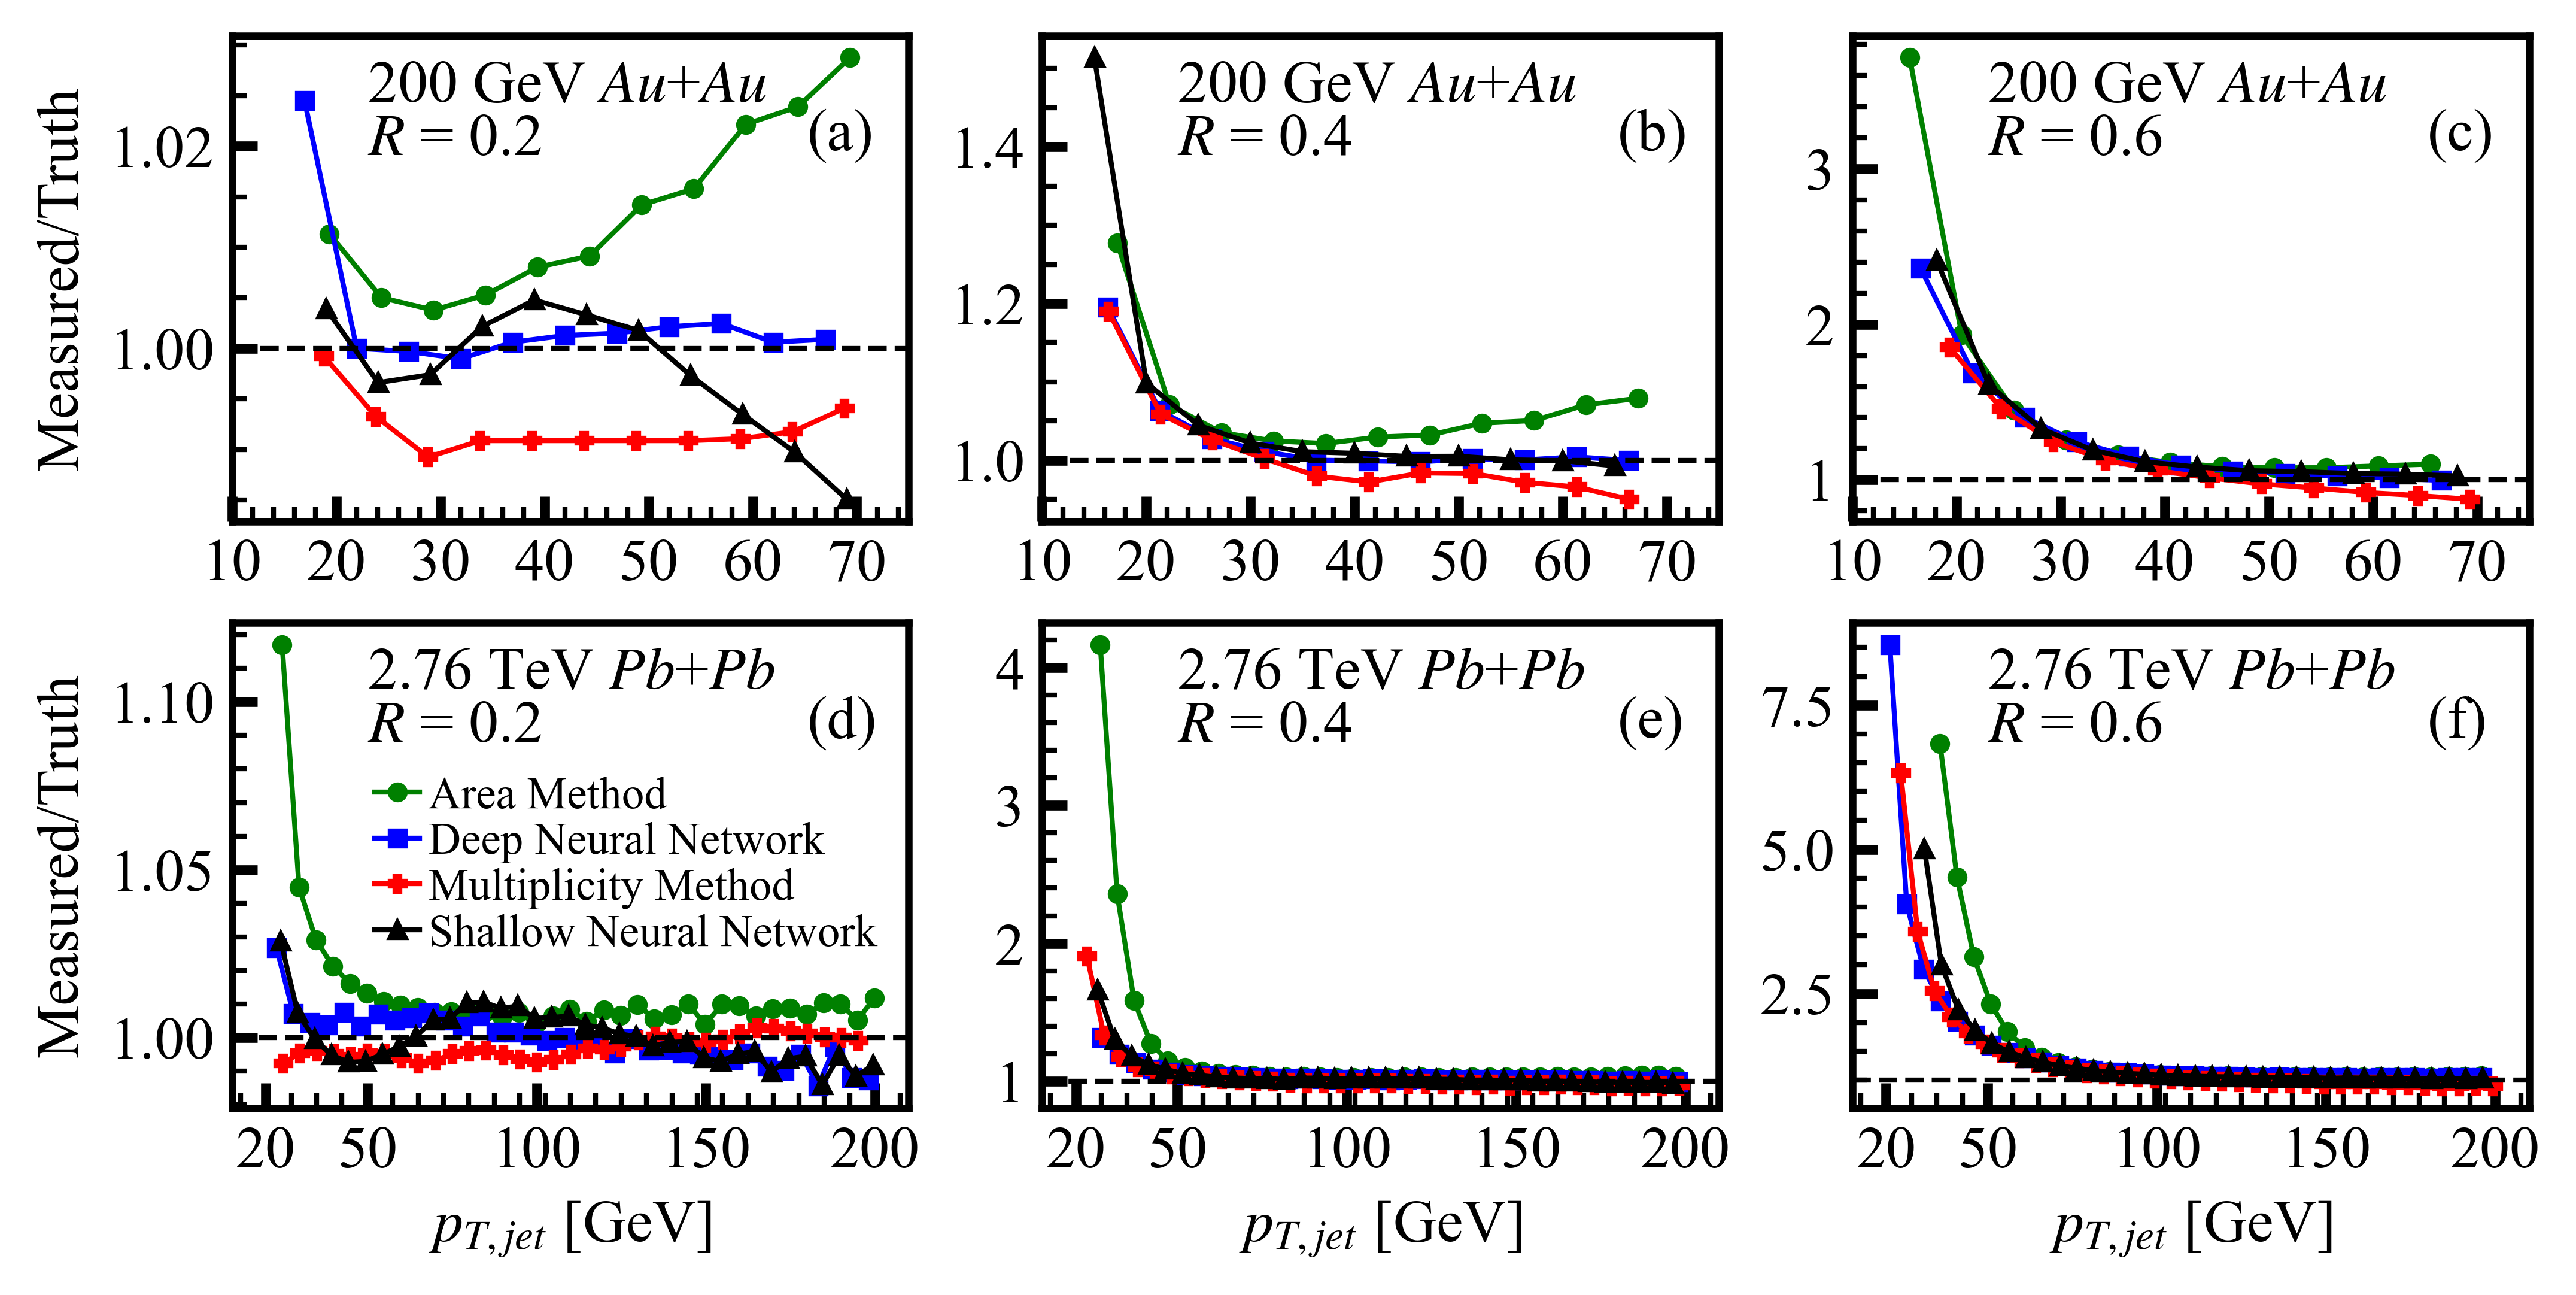

In [163]:
import paperstyle as ps
import matplotlib.pyplot as plt

fig_size = ps.GetFigSize(510.0, 2.5)

style = {'axes.labelsize': 12,
            'axes.linewidth' : 1.5,
            'font.size': 12,
            'font.family': 'Times New Roman',
            'mathtext.fontset': 'stix',
            'legend.fontsize': 12,
            'xtick.labelsize': 12,
            'ytick.labelsize': 12,
            'text.usetex': False,
            'lines.linewidth': 1,
            'lines.linestyle': ' ',
            'lines.markersize' : 3,
            'lines.markeredgewidth' : 1,
            'xtick.major.size' : 5,
            'xtick.minor.size' : 3,
            'xtick.major.width' : 2,
            'xtick.minor.width' : 1,
            'xtick.direction' : 'in',
            'ytick.major.size' : 5,
            'ytick.minor.size' : 3,
            'ytick.major.width' : 2,
            'ytick.minor.width' : 1,
            'ytick.direction' : 'in',
            'xtick.minor.visible' : True,
            'ytick.minor.visible' : True,
            'savefig.transparent': True,
            'errorbar.capsize': 1.2,
            }


plt.rcParams.update(style)
plt.rcParams.update({'figure.figsize': fig_size})

area_style = ps.area
dnn_style = ps.dnn
mult_style = ps.mult
snn_style = ps.snn

area_style = dict(color='green', marker='o', markerfacecolor='green', markeredgecolor='green', alpha=0.7, label='Area Method')
dnn_style = dict(color='blue',  marker='s', markerfacecolor='blue', markeredgecolor='blue', alpha=0.7, label='Deep Neural Network')
mult_style = dict(color='red',  marker='P', markerfacecolor='red', markeredgecolor='red', alpha=0.7, label='Multiplicity Method')
snn_style = dict(color='black',  marker='^', markerfacecolor='black', markeredgecolor='black', alpha=0.7, label='Shallow Neural Network')

styles= [area_style, mult_style, dnn_style, snn_style]


fig ,axs = plt.subplots(2, 3, dpi=600, constrained_layout=True)


datasets = ["AuAu_R02", "AuAu_R04", "AuAu_R06", "PbPb_R02", "PbPb_R04", "PbPb_R06"]
labels = [r'(a)', r'(b)', r'(c)', r'(d)', r'(e)', r'(f)']
species = [r'200 GeV $Au$+$Au$', r'200 GeV $Au$+$Au$', r'200 GeV $Au$+$Au$', r'2.76 TeV $Pb$+$Pb$', r'2.76 TeV $Pb$+$Pb$', r'2.76 TeV $Pb$+$Pb$']
radii = [r'$R$ = 0.2', r'$R$ = 0.4', r'$R$ = 0.6', r'$R$ = 0.2', r'$R$ = 0.4', r'$R$ = 0.6']

# plotted_histos = ['{}_unfolded_over_truth_Iteration{}'.format(method,2) for method in ['area','dnn','mult','snn']]
plotted_histos=['{}_measurement_over_truth'.format(method) for method in ['area','dnn','mult','snn']]
# fill types
hatches = ['//', '\\', 'x', 'o']
for i, dataset in enumerate(datasets):
        ax = axs[i//3, i%3]
        if i < 3:
                pass
                # ax.tick_params(labelbottom=False)               
        else:
            ax.set_xlabel(r"$p_{T,jet}$ [GeV]")
        
        if i == 0 or i == 3:
            ax.set_ylabel(r"Measured/Truth")
            
        if i > 2:
            stop_val = 200
        else:
            stop_val = 70
            
        if i > 2:
            start_val = 23
        else:
            start_val = 15
        
        if i ==5:
            start_val = 9
            
        
        
        y_cut = 10.0
        
        for plotted_histo in plotted_histos:
            if plotted_histo.split('_')[0] == 'area':
                style = area_style
            elif plotted_histo.split('_')[0] == 'mult':
                style = mult_style
            elif plotted_histo.split('_')[0] == 'dnn':
                style = dnn_style
            elif plotted_histo.split('_')[0] == 'snn':
                style = snn_style

            histox = histograms[dataset]['th1ds'][plotted_histo]['x'][histograms[dataset]['th1ds'][plotted_histo]['x'] < stop_val]
            histoy = histograms[dataset]['th1ds'][plotted_histo]['y'][histograms[dataset]['th1ds'][plotted_histo]['x'] < stop_val]
            histox_err = histograms[dataset]['th1ds'][plotted_histo]['x_err'][histograms[dataset]['th1ds'][plotted_histo]['x'] < stop_val]
            histoy_err = histograms[dataset]['th1ds'][plotted_histo]['y_err'][histograms[dataset]['th1ds'][plotted_histo]['x'] < stop_val]         
            histoxc = histox[histox >= start_val]
            histoyc = histoy[histox >= start_val]
            histox_errc = histox_err[histox >= start_val]
            histoy_errc = histoy_err[histox >= start_val]
            idx_to_plot = np.where(histoyc < y_cut)
            histoyc = histoyc[idx_to_plot]
            histoxc = histoxc[idx_to_plot]
            histox_errc = histox_errc[idx_to_plot]
            histoy_errc = histoy_errc[idx_to_plot]

            if i == 0 or i == 3:
                if plotted_histo == 'mult_measurement_over_truth':
                    # smooth out the mult method with a moving average
                    histoyc_running = np.zeros_like(histoyc)
                    for ibin in range(0, len(histoyc)):
                        istart = max(0, ibin-7)
                        iend = min(len(histoyc)-1, ibin+7)
                        histoyc_running[ibin] = np.mean(histoyc[istart:iend])
                    
                    
                    histoyc = histoyc_running
                    
            # histoy_errc=np.zeros_like(histoyc)
            # ax.errorbar(histoxc, histoyc, xerr=histox_errc, **style, linestyle='-')
            
            # ax.plot(histoxc, histoyc, **style, linestyle='-', markersize=0)
            color = style['color']
            hatch = hatches[plotted_histos.index(plotted_histo)]
            marker = style['marker']
            ax.plot(histoxc, histoyc, color=color, linestyle='-', marker=marker, markersize=3, markerfacecolor=color, markeredgecolor=color, label=style['label'])
            # ax.fill_between(histoxc, histoyc-histoy_errc, histoyc+histoy_errc, color=color, alpha=0.1, hatch=hatch, edgecolor='black', linewidth=0.5)
        
        ax.text(0.85, 0.85, labels[i], transform=ax.transAxes, fontsize=12, verticalalignment='top')
        ax.text(0.2, 0.95, f'{species[i]}', transform=ax.transAxes, fontsize=12, verticalalignment='top')
        ax.text(0.2, 0.84, radii[i], transform=ax.transAxes, fontsize=12, verticalalignment='top')
        # ax.set_ylim(0.8, 10.0)
        # ax.set_xscale('symlog')
        # ax.set_yscale('log')
        # ax.set_ylim(0.8, 5.0)
        if i <3:
            ax.plot([0, 100], [1, 1], 'k--')
            ax.set_xlim(10, 75)
            ax.set_xticks([10, 20, 30, 40, 50, 60, 70])
        else:
            ax.plot([10, 210], [1, 1], 'k--')
            ax.set_xlim(10, 210)
            ax.set_xticks([20, 50, 100, 150, 200])
        # ax.set_yscale('log')
        # max_from_1 =0
        # axlim = ax.get_ylim()
        # for i in range(0, len(axlim)):
        #     if abs(axlim[i]-1) > max_from_1:
        #         max_from_1 = abs(axlim[i]-1)
        # if max_from_1 > 1:
        #     axlow = 0.0
        # else:
        #     axlow = 1-max_from_1
        
        # axhigh = 1+max_from_1
         
        # ax.set_ylim(axlow, axhigh)
        
        # if i == 0:
            # ax.set_xlim(8, 72)
            # ax.set_ylim(axlow, 2.0)
        # elif i == 1:
        #     # ax.set_xlim(8, 72)
        #     ax.set_ylim(0.5, 2.0)
        # elif i == 2:
        #     # ax.set_xlim(8, 72)
        #     ax.set_ylim(0.5, 4.0)
        # elif i == 3:
        #     # ax.set_xlim(18, 112)
        #     ax.set_ylim(0.8, 2.0)
        # elif i == 4:
        #     # ax.set_xlim(18, 112)
        #     ax.set_ylim(0.0, 3.0)
        # elif i ==5:
        #     # ax.set_xlim(18, 112)
        #     ax.set_ylim(0.0, 8.0)

        if i ==3:
            ax.legend(loc='center right', fontsize=9, frameon=False, labelspacing=0.1, handletextpad=0.2, borderpad=0.2, handlelength=1.0, ncol=1, columnspacing=0.3)

fig.align_ylabels()

fig.savefig("pdf/measured_over_truth.pdf", bbox_inches='tight')
fig.savefig("png/measured_over_truth.png", bbox_inches='tight')
plt.show()


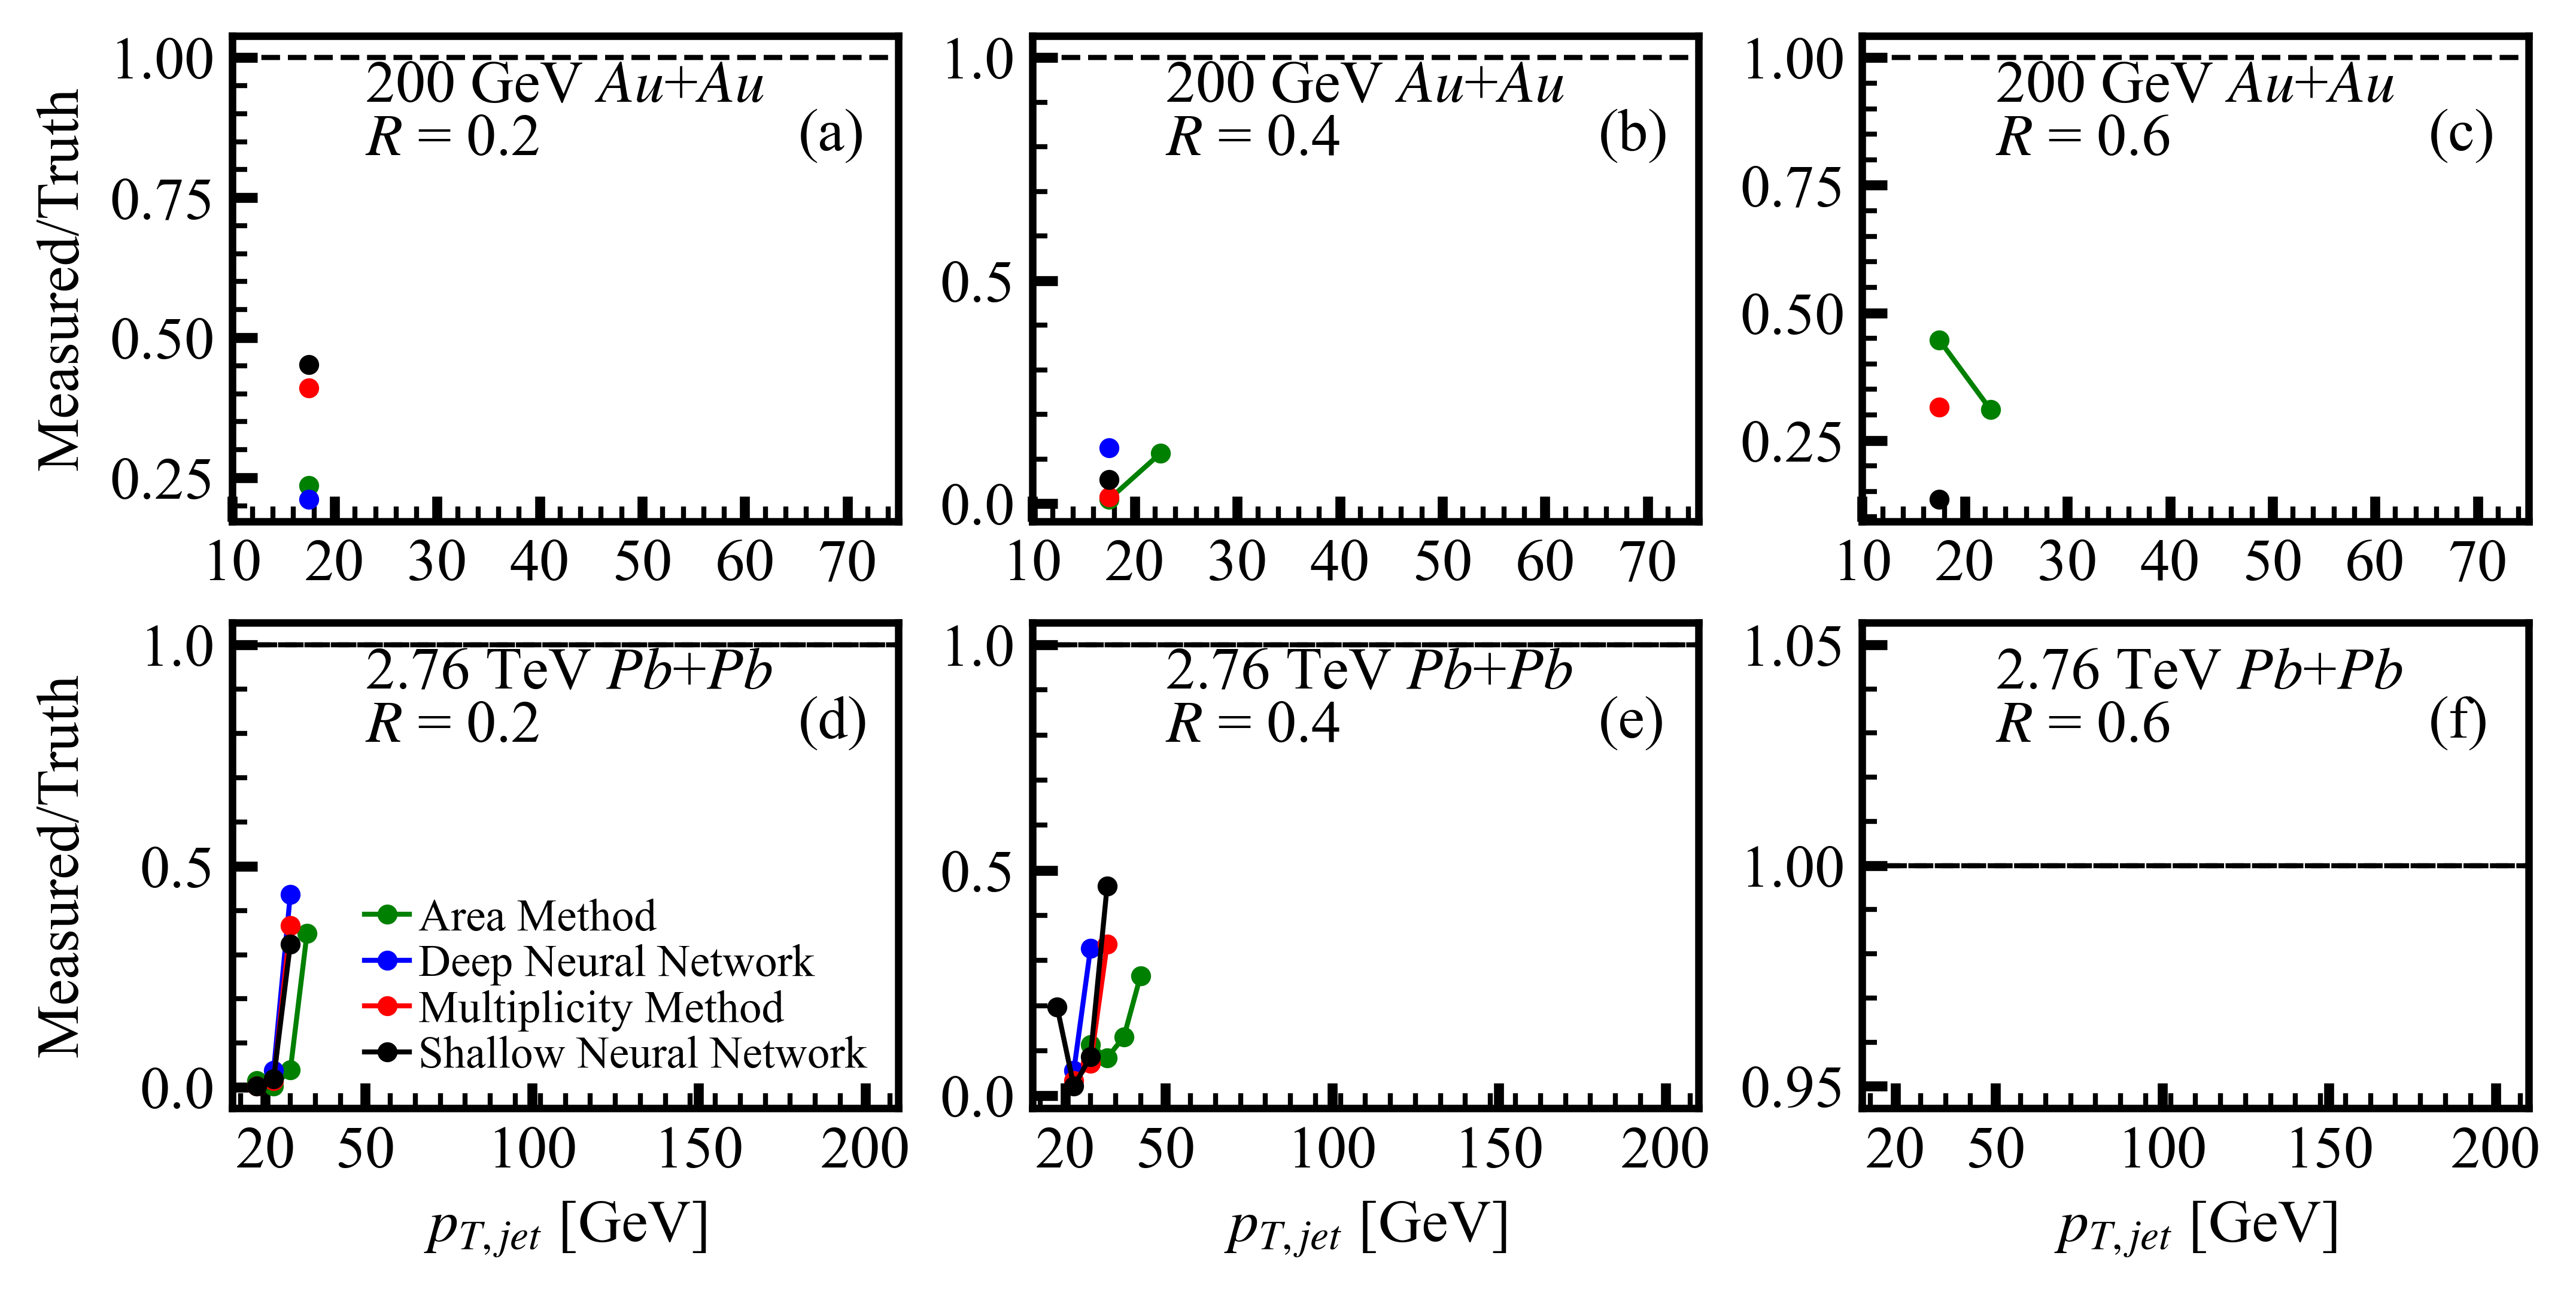

In [105]:

fig_size = ps.GetFigSize(510.0, 2.5)

style = {'axes.labelsize': 12,
            'axes.linewidth' : 1.5,
            'font.size': 12,
            'font.family': 'Times New Roman',
            'mathtext.fontset': 'stix',
            'legend.fontsize': 12,
            'xtick.labelsize': 12,
            'ytick.labelsize': 12,
            'text.usetex': False,
            'lines.linewidth': 1,
            'lines.linestyle': ' ',
            'lines.markersize' : 3,
            'lines.markeredgewidth' : 1,
            'xtick.major.size' : 5,
            'xtick.minor.size' : 3,
            'xtick.major.width' : 2,
            'xtick.minor.width' : 1,
            'xtick.direction' : 'in',
            'ytick.major.size' : 5,
            'ytick.minor.size' : 3,
            'ytick.major.width' : 2,
            'ytick.minor.width' : 1,
            'ytick.direction' : 'in',
            'xtick.minor.visible' : True,
            'ytick.minor.visible' : True,
            'savefig.transparent': True,
            'errorbar.capsize': 1.2,
            }


plt.rcParams.update(style)
plt.rcParams.update({'figure.figsize': fig_size})

area_style = ps.area
dnn_style = ps.dnn
mult_style = ps.mult
snn_style = ps.snn

area_style = dict(color='green', marker='o', markerfacecolor='green', markeredgecolor='green', alpha=0.7, label='Area Method')
dnn_style = dict(color='blue',  marker='s', markerfacecolor='blue', markeredgecolor='blue', alpha=0.7, label='Deep Neural Network')
mult_style = dict(color='red',  marker='P', markerfacecolor='red', markeredgecolor='red', alpha=0.7, label='Multiplicity Method')
snn_style = dict(color='black',  marker='^', markerfacecolor='black', markeredgecolor='black', alpha=0.7, label='Shallow Neural Network')

styles= [area_style, mult_style, dnn_style, snn_style]


fig ,axs = plt.subplots(2, 3, dpi=600, constrained_layout=True)


datasets = ["AuAu_R02", "AuAu_R04", "AuAu_R06", "PbPb_R02", "PbPb_R04", "PbPb_R06"]
labels = [r'(a)', r'(b)', r'(c)', r'(d)', r'(e)', r'(f)']
species = [r'200 GeV $Au$+$Au$', r'200 GeV $Au$+$Au$', r'200 GeV $Au$+$Au$', r'2.76 TeV $Pb$+$Pb$', r'2.76 TeV $Pb$+$Pb$', r'2.76 TeV $Pb$+$Pb$']
radii = [r'$R$ = 0.2', r'$R$ = 0.4', r'$R$ = 0.6', r'$R$ = 0.2', r'$R$ = 0.4', r'$R$ = 0.6']

plotted_histos = ['{}_unfolded_over_truth_Iteration{}'.format(method,5) for method in ['area','dnn','mult','snn']]
# plotted_histos=['{}_measurement_over_truth'.format(method) for method in ['area','dnn','mult','snn']]
# fill types
hatches = ['//', '\\', 'x', 'o']
for i, dataset in enumerate(datasets):
        ax = axs[i//3, i%3]
        if i < 3:
                pass
                # ax.tick_params(labelbottom=False)               
        else:
            ax.set_xlabel(r"$p_{T,jet}$ [GeV]")
        
        if i == 0 or i == 3:
            ax.set_ylabel(r"Measured/Truth")
            
        if i > 2:
            stop_val = 295
        else:
            stop_val = 100
        
        start_val = 1
            
      
        
        
        y_cut = 0.5
        
            
        
        
        # y_cut = 10.0
        
        for plotted_histo in plotted_histos:
            if plotted_histo.split('_')[0] == 'area':
                style = area_style
            elif plotted_histo.split('_')[0] == 'mult':
                style = mult_style
            elif plotted_histo.split('_')[0] == 'dnn':
                style = dnn_style
            elif plotted_histo.split('_')[0] == 'snn':
                style = snn_style

            histox = histograms[dataset]['th1ds'][plotted_histo]['x'][histograms[dataset]['th1ds'][plotted_histo]['x'] < stop_val]
            histoy = histograms[dataset]['th1ds'][plotted_histo]['y'][histograms[dataset]['th1ds'][plotted_histo]['x'] < stop_val]
            histox_err = histograms[dataset]['th1ds'][plotted_histo]['x_err'][histograms[dataset]['th1ds'][plotted_histo]['x'] < stop_val]
            histoy_err = histograms[dataset]['th1ds'][plotted_histo]['y_err'][histograms[dataset]['th1ds'][plotted_histo]['x'] < stop_val]         
            histoxc = histox[histox >= start_val]
            histoyc = histoy[histox >= start_val]
            histox_errc = histox_err[histox >= start_val]
            histoy_errc = histoy_err[histox >= start_val]
            idx_to_plot = np.where(histoyc < y_cut)
            histoyc = histoyc[idx_to_plot]
            histoxc = histoxc[idx_to_plot]
            histox_errc = histox_errc[idx_to_plot]
            histoy_errc = histoy_errc[idx_to_plot]

            if i == 0 or i == 3:
                if plotted_histo == 'mult_measurement_over_truth':
                    # smooth out the mult method with a moving average
                    histoyc_running = np.zeros_like(histoyc)
                    for ibin in range(0, len(histoyc)):
                        istart = max(0, ibin-7)
                        iend = min(len(histoyc)-1, ibin+7)
                        histoyc_running[ibin] = np.mean(histoyc[istart:iend])
                    
                    
                    histoyc = histoyc_running
                    
            # histoy_errc=np.zeros_like(histoyc)
            # ax.errorbar(histoxc, histoyc, xerr=histox_errc, **style, linestyle='-')
            
            # ax.plot(histoxc, histoyc, **style, linestyle='-', markersize=0)
            color = style['color']
            hatch = hatches[plotted_histos.index(plotted_histo)]
            ax.plot(histoxc, histoyc, color=color, linestyle='-', marker='o', markersize=3, markerfacecolor=color, markeredgecolor=color, label=style['label'])
            # ax.fill_between(histoxc, histoyc-histoy_errc, histoyc+histoy_errc, color=color, alpha=0.1, hatch=hatch, edgecolor='black', linewidth=0.5)
        
        ax.text(0.85, 0.85, labels[i], transform=ax.transAxes, fontsize=12, verticalalignment='top')
        ax.text(0.2, 0.95, f'{species[i]}', transform=ax.transAxes, fontsize=12, verticalalignment='top')
        ax.text(0.2, 0.84, radii[i], transform=ax.transAxes, fontsize=12, verticalalignment='top')
        # ax.set_ylim(0.8, 10.0)
        # ax.set_xscale('symlog')
        # ax.set_yscale('log')
        # ax.set_ylim(0.8, 5.0)
        if i <3:
            ax.plot([0, 100], [1, 1], 'k--')
            ax.set_xlim(10, 75)
            ax.set_xticks([10, 20, 30, 40, 50, 60, 70])
        else:
            ax.plot([10, 210], [1, 1], 'k--')
            ax.set_xlim(10, 210)
            ax.set_xticks([20, 50, 100, 150, 200])
        # ax.set_yscale('log')
        # max_from_1 =0
        # axlim = ax.get_ylim()
        # for i in range(0, len(axlim)):
        #     if abs(axlim[i]-1) > max_from_1:
        #         max_from_1 = abs(axlim[i]-1)
        # if max_from_1 > 1:
        #     axlow = 0.0
        # else:
        #     axlow = 1-max_from_1
        
        # axhigh = 1+max_from_1
         
        # ax.set_ylim(axlow, axhigh)
        
        # if i == 0:
            # ax.set_xlim(8, 72)
            # ax.set_ylim(axlow, 2.0)
        # elif i == 1:
        #     # ax.set_xlim(8, 72)
        #     ax.set_ylim(0.5, 2.0)
        # elif i == 2:
        #     # ax.set_xlim(8, 72)
        #     ax.set_ylim(0.5, 4.0)
        # elif i == 3:
        #     # ax.set_xlim(18, 112)
        #     ax.set_ylim(0.8, 2.0)
        # elif i == 4:
        #     # ax.set_xlim(18, 112)
        #     ax.set_ylim(0.0, 3.0)
        # elif i ==5:
        #     # ax.set_xlim(18, 112)
        #     ax.set_ylim(0.0, 8.0)
            
        ax.plot([0, 300], [1, 1], 'k--')
        
        # if i < 2:
        #     ax.set_xlim(10, 75)
        # else:
        #     ax.set_xlim(10, 150)
        
        # if i == 5:
        #     ax.set_xlim(70, 150)
        # if i == 2:
        #     ax.set_xlim(20, 75)
        if i ==3:
            ax.legend(loc='lower right', fontsize=9, frameon=False, labelspacing=0.1, handletextpad=0.2, borderpad=0.2, handlelength=1.0, ncol=1, columnspacing=0.3)

fig.align_ylabels()

In [157]:
# # architechture = [23,235,14,1]
# # for i in range(1,len(architechture)-1):
# #     print(architechture[i])

# node_list = [23,235,14,1]
# new_node_list = []
# threshold = 3
# for i in range(len(node_list)-2,-1,-1):
#     if node_list[i] < threshold:
#             node_list[i-1] = node_list[i-1] + node_list[i]
#             node_list[i] = 0
#     for i in range(len(node_list)):
#         if node_list[i] != 0:
#             new_node_list.append(node_list[i])


# print(new_node_list)

def CombineLayersBelowNodeThreshold(node_list, threshold):
        # combine layers below a certain threshold to the previous layer
        new_node_list = []
        # loop in reverse order
        for i in range(len(node_list)-2,-1,-1):
                if node_list[i] < threshold:
                        node_list[i-1] = node_list[i-1] + node_list[i]
                        node_list[i] = 0
        for i in range(len(node_list)):
                if node_list[i] != 0:
                        new_node_list.append(node_list[i])
        return new_node_list

nlist = [23,1,1]
threshold = 3
print(CombineLayersBelowNodeThreshold(nlist, threshold))


[24, 1]


In [158]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

INPUTSIZE = 200
input = layers.Input(shape=(INPUTSIZE,1))
conv1 = layers.Conv1D(kernel_size=4, filters=16, activation='relu', name='conv1')(input)
flatten1 = layers.Flatten(name='flatten1')(conv1)
dense1 = layers.Dense(32, activation='relu', name='dense1')(flatten1)
denseout = layers.Dense(1, activation='linear', name='pileupoutput')(dense1)
model = models.Model(inputs=input, outputs=denseout)
model.summary()

weight_matrices = model.get_weights()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 1)]          0         
                                                                 
 conv1 (Conv1D)              (None, 197, 16)           80        
                                                                 
 flatten1 (Flatten)          (None, 3152)              0         
                                                                 
 dense1 (Dense)              (None, 32)                100896    
                                                                 
 pileupoutput (Dense)        (None, 1)                 33        
                                                                 
Total params: 101,009
Trainable params: 101,009
Non-trainable params: 0
_________________________________________________________________


2024-02-07 16:42:53.227559: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-07 16:42:58.672965: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-07 16:42:58.887772: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-02-07 16:42:58.887788: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [161]:
for i in range(len(weight_matrices)):
    print(weight_matrices[i].shape)

(4, 1, 16)
(16,)
(3152, 32)
(32,)
(32, 1)
(1,)


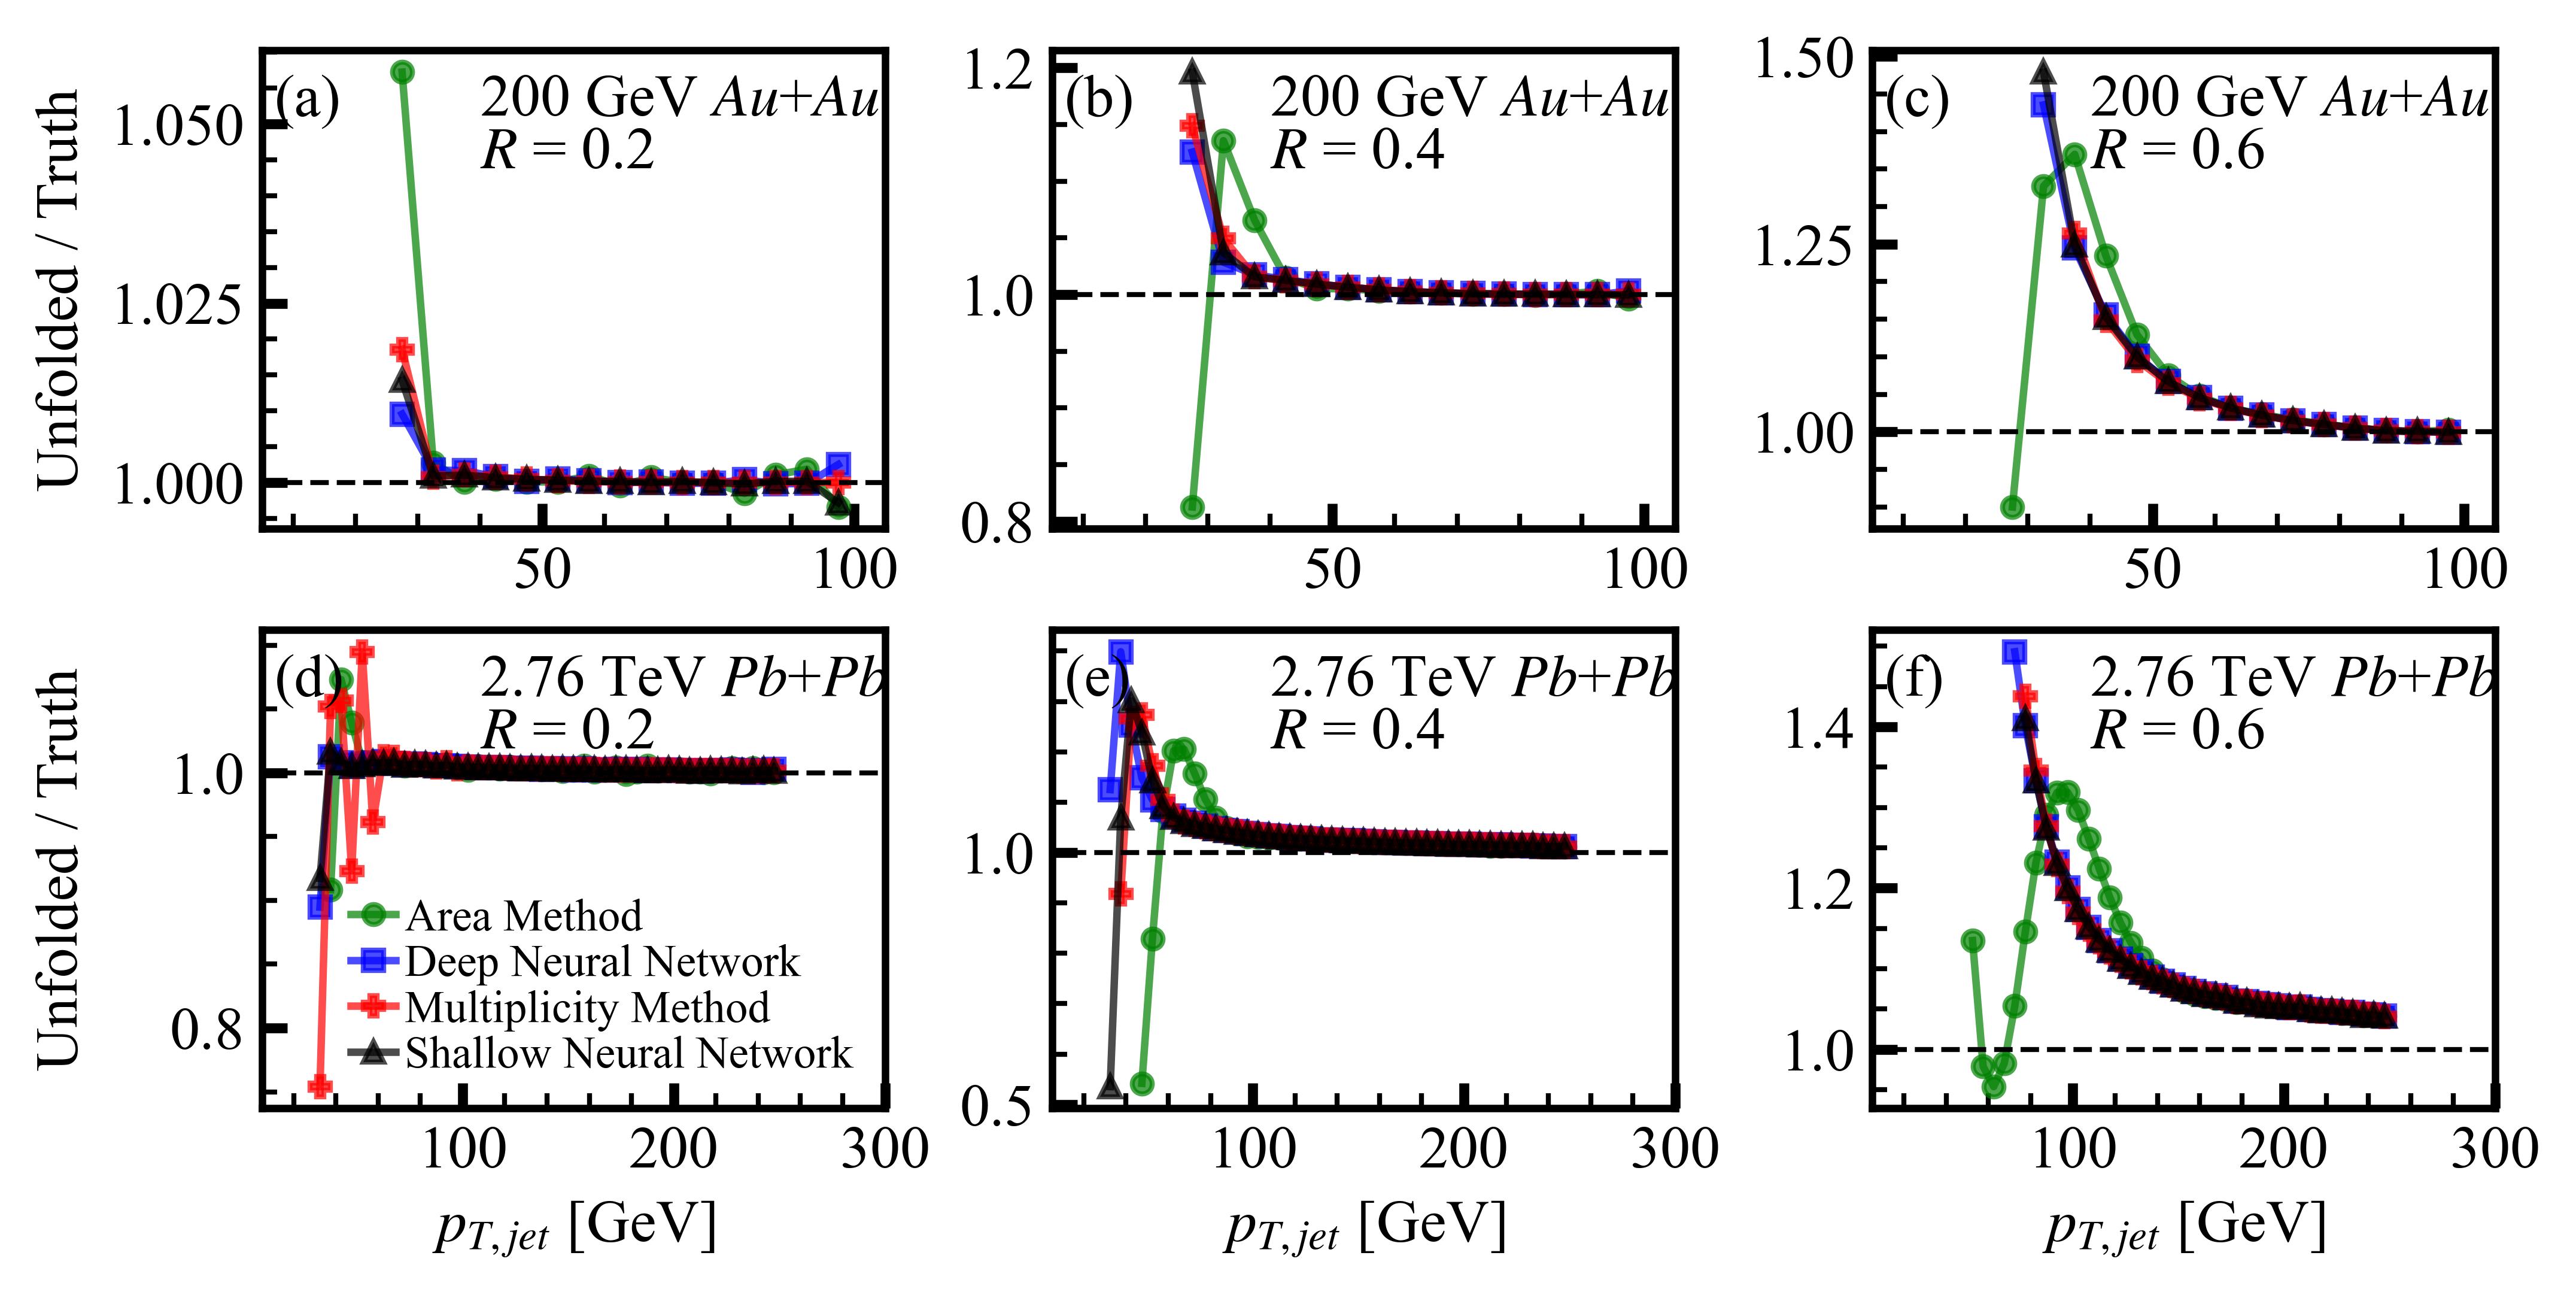

In [149]:
import paperstyle as ps
import matplotlib.pyplot as plt

fig_size = ps.GetFigSize(510.0, 2.5)
plt.rcParams.update(ps.style)
plt.rcParams.update({'figure.figsize': fig_size})

area_style = ps.area
dnn_style = ps.dnn
mult_style = ps.mult
snn_style = ps.snn
styles= [area_style, mult_style, dnn_style, snn_style]

# area_style = dict(color='green', marker=' ', markerfacecolor='green', markeredgecolor='green', alpha=0.7, label='Area Method', markersize=4)
# dnn_style = dict(color='blue',  marker=' ', markerfacecolor='blue', markeredgecolor='blue', alpha=0.7, label='Deep Neural Network', markersize=4)
# mult_style = dict(color='red',  marker=' ', markerfacecolor='red', markeredgecolor='red', alpha=0.7, label='Multiplicity Method', markersize=4)
# snn_style = dict(color='black',  marker=' ', markerfacecolor='black', markeredgecolor='black', alpha=0.7, label='Shallow Neural Network', markersize=4)


area_style = dict(color='green', marker='o', markerfacecolor='green', markeredgecolor='green', alpha=0.7, label='Area Method', markersize=4)
dnn_style = dict(color='blue',  marker='s', markerfacecolor='blue', markeredgecolor='blue', alpha=0.7, label='Deep Neural Network', markersize=4)
mult_style = dict(color='red',  marker='P', markerfacecolor='red', markeredgecolor='red', alpha=0.7, label='Multiplicity Method', markersize=4)
snn_style = dict(color='black',  marker='^', markerfacecolor='black', markeredgecolor='black', alpha=0.7, label='Shallow Neural Network', markersize=4)

fig ,axs = plt.subplots(2, 3, dpi=600, constrained_layout=True)


datasets = ["AuAu_R02", "AuAu_R04", "AuAu_R06", "PbPb_R02", "PbPb_R04", "PbPb_R06"]
labels = [r'(a)', r'(b)', r'(c)', r'(d)', r'(e)', r'(f)']
species = [r'200 GeV $Au$+$Au$', r'200 GeV $Au$+$Au$', r'200 GeV $Au$+$Au$', r'2.76 TeV $Pb$+$Pb$', r'2.76 TeV $Pb$+$Pb$', r'2.76 TeV $Pb$+$Pb$']
radii = [r'$R$ = 0.2', r'$R$ = 0.4', r'$R$ = 0.6', r'$R$ = 0.2', r'$R$ = 0.4', r'$R$ = 0.6']

plotted_histos = ['{}_unfolded_over_truth_Iteration{}'.format(method,4) for method in ['area','dnn','mult','snn']]
# plotted_histos = ['{}_unfolded_over_truth_Iteration{}'.format(method,5) for method in ['area','mult']]
# plotted_histos=['{}_measurement_over_truth_normalized'.format(method) for method in ['area','mult', 'dnn', 'snn']]

for i, dataset in enumerate(datasets):
        ax = axs[i//3, i%3]
        if i < 3:
                pass
                # ax.tick_params(labelbottom=False)               
        else:
            ax.set_xlabel(r"$p_{T,jet}$ [GeV]")
        
        if i == 0 or i == 3:
            ax.set_ylabel(r"Unfolded / Truth")
            
        # if i > 2:
        #     stop_val = 295
        # else:
        #     stop_val = 100
        
        if i > 2:
            stop_val = 249
        elif i < 3:
            stop_val = 100
        
        start_val = 25
            
        y_cut = 0.5
            
      
        
        
        y_cut = 0.5
        
        for plotted_histo in plotted_histos:
            if plotted_histo.split('_')[0] == 'area':
                style = area_style
            elif plotted_histo.split('_')[0] == 'mult':
                style = mult_style
            elif plotted_histo.split('_')[0] == 'dnn':
                style = dnn_style
            elif plotted_histo.split('_')[0] == 'snn':
                style = snn_style
        
            histox = histograms[dataset]['th1ds'][plotted_histo]['x'][histograms[dataset]['th1ds'][plotted_histo]['x'] < stop_val]
            histoy = histograms[dataset]['th1ds'][plotted_histo]['y'][histograms[dataset]['th1ds'][plotted_histo]['x'] < stop_val]
            histox_err = histograms[dataset]['th1ds'][plotted_histo]['x_err'][histograms[dataset]['th1ds'][plotted_histo]['x'] < stop_val]
            histoy_err = histograms[dataset]['th1ds'][plotted_histo]['y_err'][histograms[dataset]['th1ds'][plotted_histo]['x'] < stop_val]
        
            histoxc = histox[histox >= start_val]
            histoyc = histoy[histox >= start_val]
            histox_errc = histox_err[histox >= start_val]
            histoy_errc = histoy_err[histox >= start_val]
            
            idx_to_plot = np.where(np.abs(histoyc-1.0) < y_cut)

            # remove points below the cut
            # idx_cut = idx_to_plot[0][-1]
            # print(idx_cut)
            # histoyc = histoyc[idx_cut+1:]
            # histoxc = histoxc[idx_cut+1:]
            # histox_errc = histox_errc[idx_cut+1:]
            # histoy_errc = histoy_errc[idx_cut+1:]




            histoyc = histoyc[idx_to_plot]
            histoxc = histoxc[idx_to_plot]
            histox_errc = histox_errc[idx_to_plot]
            histoy_errc = histoy_errc[idx_to_plot]
            histoy_errc=np.zeros_like(histoyc)
            # ax.errorbar(histoxc, histoyc, xerr=histox_errc, yerr=histoy_errc, **style, linestyle=' ')
            ax.plot(histoxc, histoyc, **style, linestyle='-', linewidth=1.5)
        
        
        ax.text(0.02, 0.95, labels[i], transform=ax.transAxes, fontsize=12, verticalalignment='top')
        ax.text(0.35, 0.95, f'{species[i]}', transform=ax.transAxes, fontsize=12, verticalalignment='top')
        ax.text(0.35, 0.84, radii[i], transform=ax.transAxes, fontsize=12, verticalalignment='top')
        # ax.set_ylim(0.5, 1.5)
        # ax.set_yscale('log')
        ax.plot([0, 300], [1, 1], 'k--')
        
        if i < 3:
            ax.set_xlim(5, 105)
        else:
            ax.set_xlim(5, 300)
        
        # if i == 5:
        #     ax.set_xlim(70, 150)
        # if i == 2:
        #     ax.set_xlim(20, 75)
        if i ==3:
            ax.legend(loc='lower right', fontsize=9, frameon=False, labelspacing=0.1, handletextpad=0.2, borderpad=0.2, handlelength=1.0, ncol=1, columnspacing=0.3)

fig.align_ylabels()

# fig.savefig("pdf/Unfolded_over_truth.pdf", bbox_inches='tight')
# fig.savefig("png/Unfolded_over_truth.png", bbox_inches='tight')
plt.show()


In [ ]:
import paperstyle as ps
import matplotlib.pyplot as plt

fig_size = ps.GetFigSize(510.0, 2.5)
plt.rcParams.update(ps.style)
plt.rcParams.update({'figure.figsize': fig_size})

area_style = ps.area
dnn_style = ps.dnn
mult_style = ps.mult
snn_style = ps.snn
styles= [area_style, mult_style, dnn_style, snn_style]

# area_style = dict(color='green', marker=' ', markerfacecolor='green', markeredgecolor='green', alpha=0.7, label='Area Method', markersize=4)
# dnn_style = dict(color='blue',  marker=' ', markerfacecolor='blue', markeredgecolor='blue', alpha=0.7, label='Deep Neural Network', markersize=4)
# mult_style = dict(color='red',  marker=' ', markerfacecolor='red', markeredgecolor='red', alpha=0.7, label='Multiplicity Method', markersize=4)
# snn_style = dict(color='black',  marker=' ', markerfacecolor='black', markeredgecolor='black', alpha=0.7, label='Shallow Neural Network', markersize=4)


area_style = dict(color='green', marker='o', markerfacecolor='green', markeredgecolor='green', alpha=0.7, label='Area Method', markersize=4)
dnn_style = dict(color='blue',  marker='s', markerfacecolor='blue', markeredgecolor='blue', alpha=0.7, label='Deep Neural Network', markersize=4)
mult_style = dict(color='red',  marker='P', markerfacecolor='red', markeredgecolor='red', alpha=0.7, label='Multiplicity Method', markersize=4)
snn_style = dict(color='black',  marker='^', markerfacecolor='black', markeredgecolor='black', alpha=0.7, label='Shallow Neural Network', markersize=4)

fig ,axs = plt.subplots(2, 3, dpi=600, constrained_layout=True)


datasets = ["AuAu_R02", "AuAu_R04", "AuAu_R06", "PbPb_R02", "PbPb_R04", "PbPb_R06"]
labels = [r'(a)', r'(b)', r'(c)', r'(d)', r'(e)', r'(f)']
species = [r'200 GeV $Au$+$Au$', r'200 GeV $Au$+$Au$', r'200 GeV $Au$+$Au$', r'2.76 TeV $Pb$+$Pb$', r'2.76 TeV $Pb$+$Pb$', r'2.76 TeV $Pb$+$Pb$']
radii = [r'$R$ = 0.2', r'$R$ = 0.4', r'$R$ = 0.6', r'$R$ = 0.2', r'$R$ = 0.4', r'$R$ = 0.6']

ratio_histos = ['{}_unfolded_over_truth_Iteration{}'.format(method,4) for method in ['area','dnn','mult','snn']]
# plotted_histos = ['{}_unfolded_over_truth_Iteration{}'.format(method,5) for method in ['area','mult']]
# plotted_histos=['{}_measurement_over_truth_normalized'.format(method) for method in ['area','mult', 'dnn', 'snn']]

for i, dataset in enumerate(datasets):
        ax = axs[i//3, i%3]
        if i < 3:
                pass
                # ax.tick_params(labelbottom=False)               
        else:
            ax.set_xlabel(r"$p_{T,jet}$ [GeV]")
        
        if i == 0 or i == 3:
            ax.set_ylabel(r"Unfolded / Truth")
            
        # if i > 2:
        #     stop_val = 295
        # else:
        #     stop_val = 100
        
        if i > 2:
            stop_val = 249
        elif i < 3:
            stop_val = 100
        
        start_val = 25
            
        y_cut = 0.5
            
      
        
        
        y_cut = 0.5
        
        for plotted_histo in plotted_histos:
            if plotted_histo.split('_')[0] == 'area':
                style = area_style
            elif plotted_histo.split('_')[0] == 'mult':
                style = mult_style
            elif plotted_histo.split('_')[0] == 'dnn':
                style = dnn_style
            elif plotted_histo.split('_')[0] == 'snn':
                style = snn_style
        
            histox = histograms[dataset]['th1ds'][plotted_histo]['x'][histograms[dataset]['th1ds'][plotted_histo]['x'] < stop_val]
            histoy = histograms[dataset]['th1ds'][plotted_histo]['y'][histograms[dataset]['th1ds'][plotted_histo]['x'] < stop_val]
            histox_err = histograms[dataset]['th1ds'][plotted_histo]['x_err'][histograms[dataset]['th1ds'][plotted_histo]['x'] < stop_val]
            histoy_err = histograms[dataset]['th1ds'][plotted_histo]['y_err'][histograms[dataset]['th1ds'][plotted_histo]['x'] < stop_val]
        
            histoxc = histox[histox >= start_val]
            histoyc = histoy[histox >= start_val]
            histox_errc = histox_err[histox >= start_val]
            histoy_errc = histoy_err[histox >= start_val]
            
            idx_to_plot = np.where(np.abs(histoyc-1.0) < y_cut)

            # remove points below the cut
            # idx_cut = idx_to_plot[0][-1]
            # print(idx_cut)
            # histoyc = histoyc[idx_cut+1:]
            # histoxc = histoxc[idx_cut+1:]
            # histox_errc = histox_errc[idx_cut+1:]
            # histoy_errc = histoy_errc[idx_cut+1:]




            histoyc = histoyc[idx_to_plot]
            histoxc = histoxc[idx_to_plot]
            histox_errc = histox_errc[idx_to_plot]
            histoy_errc = histoy_errc[idx_to_plot]
            histoy_errc=np.zeros_like(histoyc)
            # ax.errorbar(histoxc, histoyc, xerr=histox_errc, yerr=histoy_errc, **style, linestyle=' ')
            ax.plot(histoxc, histoyc, **style, linestyle='-', linewidth=1.5)
        
        
        ax.text(0.02, 0.95, labels[i], transform=ax.transAxes, fontsize=12, verticalalignment='top')
        ax.text(0.35, 0.95, f'{species[i]}', transform=ax.transAxes, fontsize=12, verticalalignment='top')
        ax.text(0.35, 0.84, radii[i], transform=ax.transAxes, fontsize=12, verticalalignment='top')
        # ax.set_ylim(0.5, 1.5)
        # ax.set_yscale('log')
        ax.plot([0, 300], [1, 1], 'k--')
        
        if i < 3:
            ax.set_xlim(5, 105)
        else:
            ax.set_xlim(5, 300)
        
        # if i == 5:
        #     ax.set_xlim(70, 150)
        # if i == 2:
        #     ax.set_xlim(20, 75)
        if i ==3:
            ax.legend(loc='lower right', fontsize=9, frameon=False, labelspacing=0.1, handletextpad=0.2, borderpad=0.2, handlelength=1.0, ncol=1, columnspacing=0.3)

fig.align_ylabels()

# fig.savefig("pdf/Unfolded_over_truth.pdf", bbox_inches='tight')
# fig.savefig("png/Unfolded_over_truth.png", bbox_inches='tight')
plt.show()


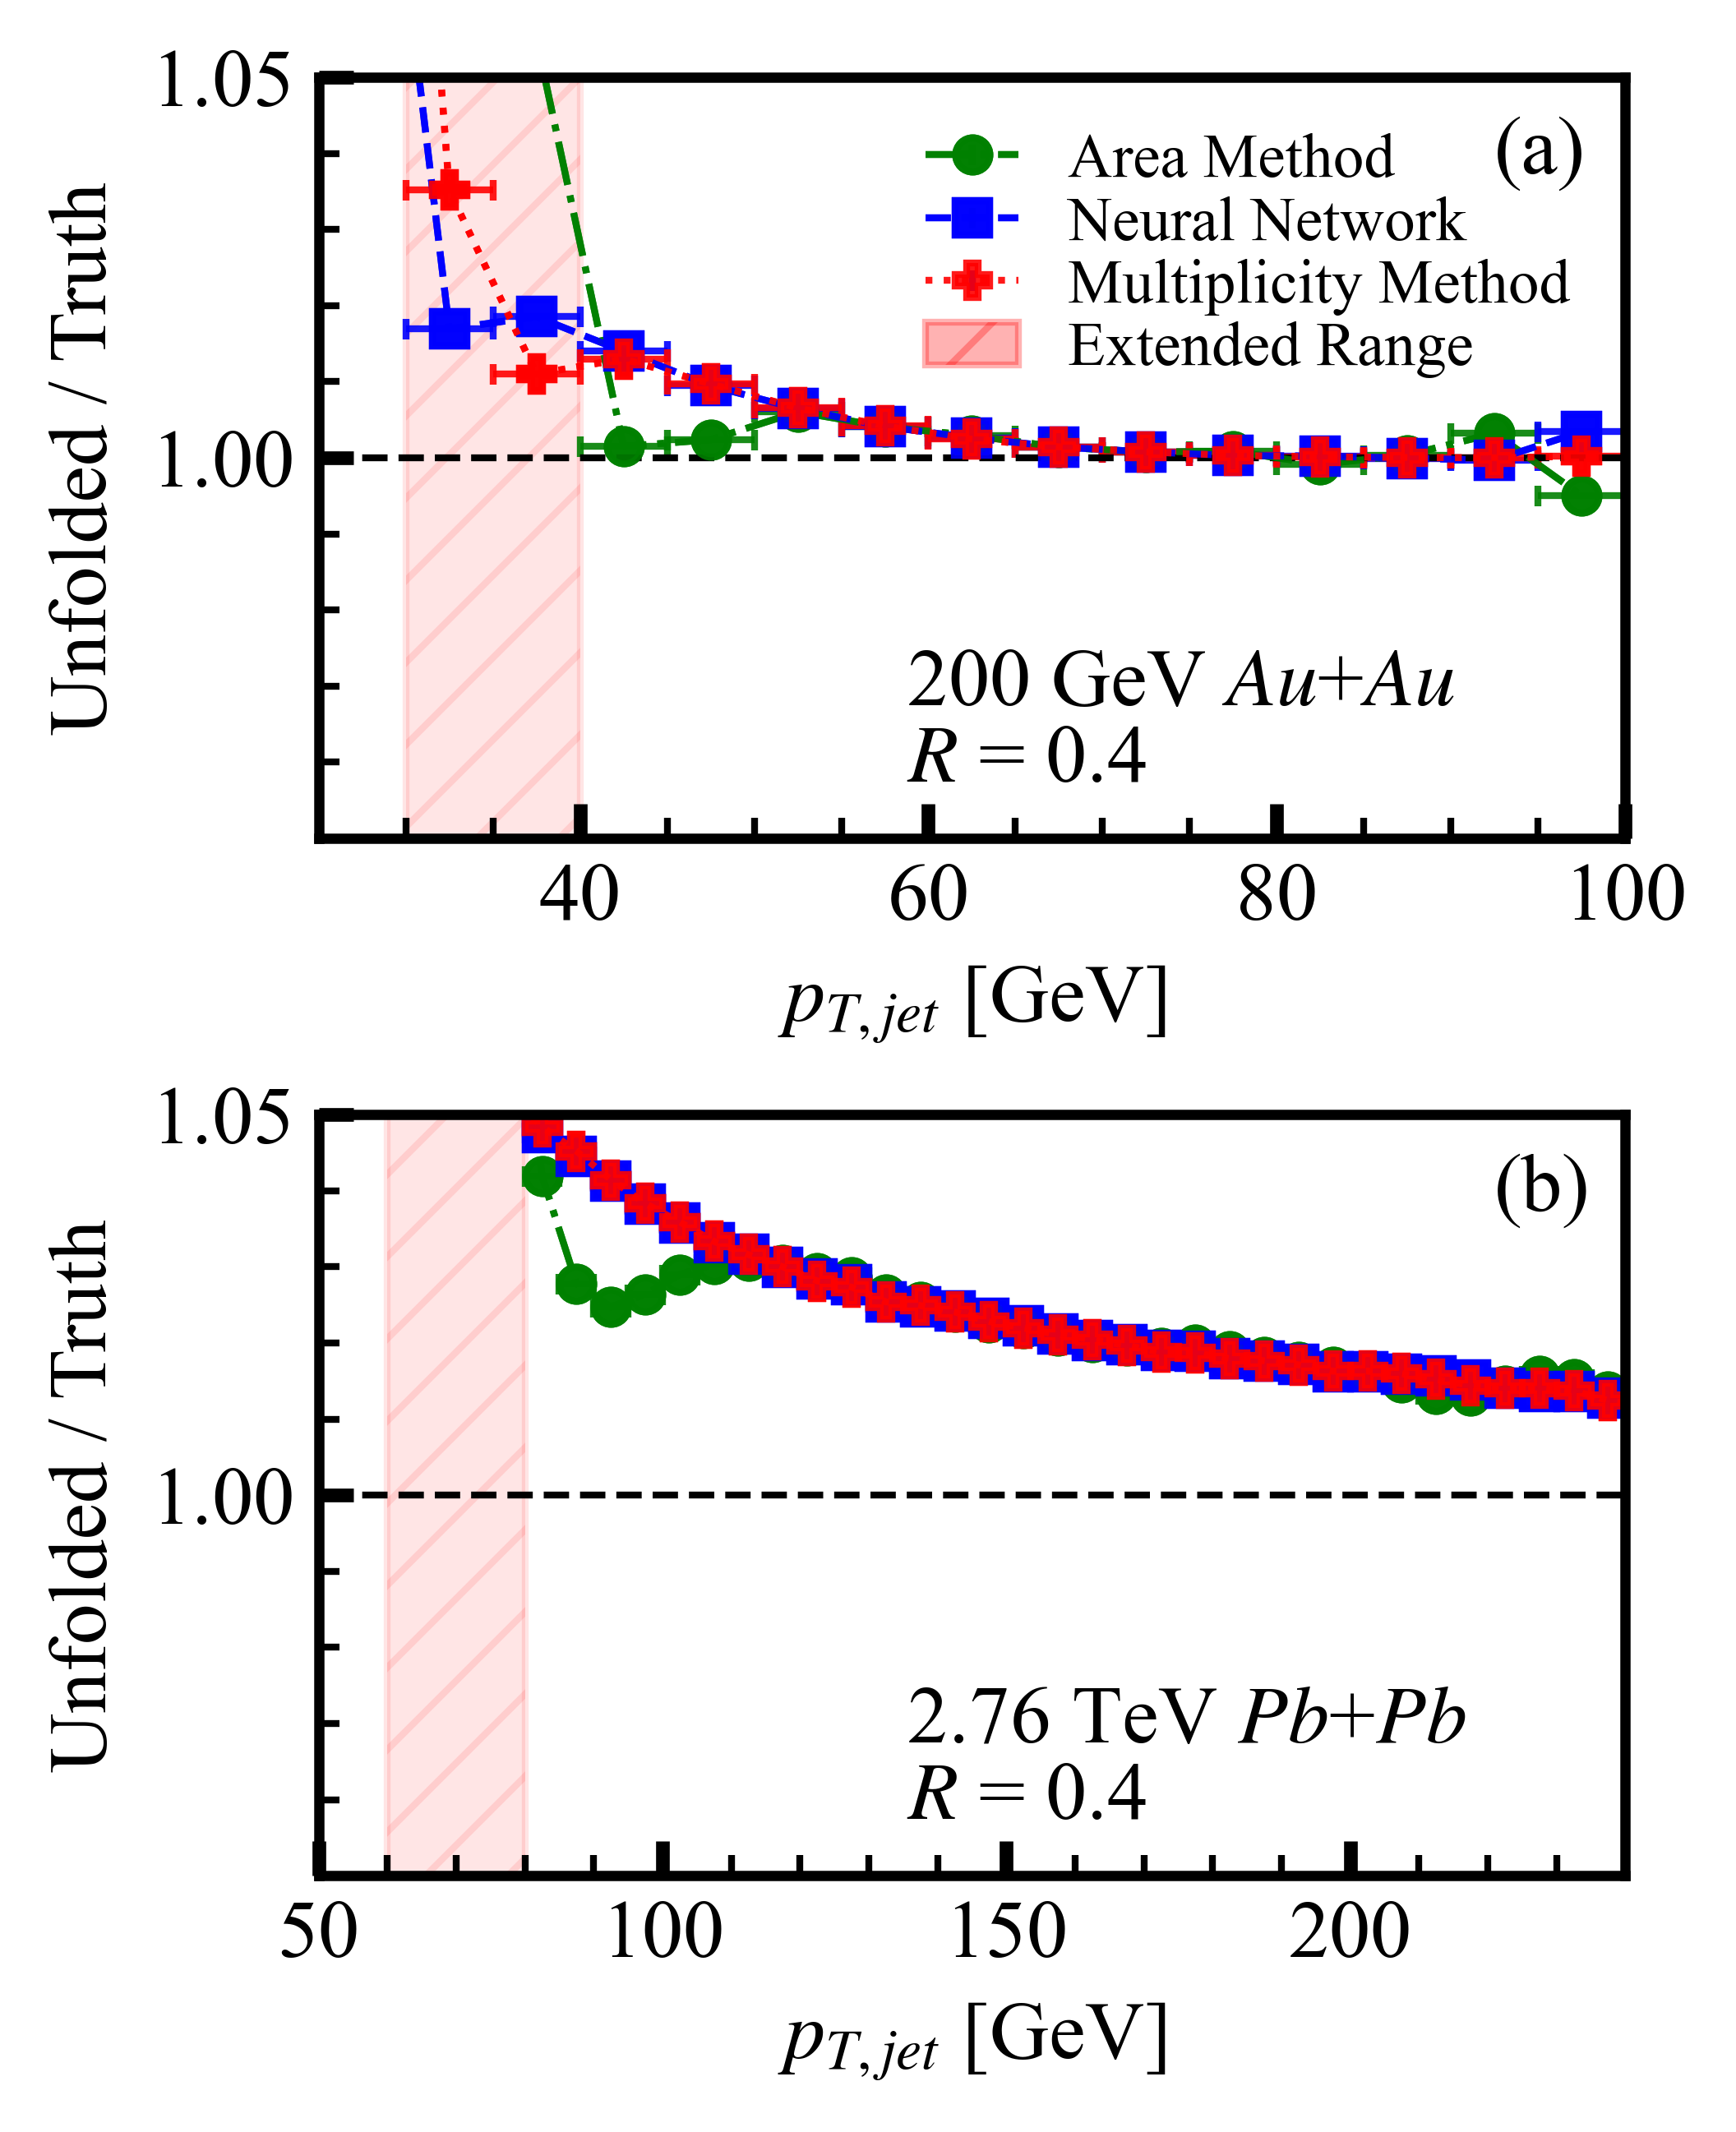

In [24]:
import paperstyle as ps
import matplotlib.pyplot as plt

fig_size = ps.GetFigSize(246.0, 1.0)
plt.rcParams.update(ps.style)
plt.rcParams.update({'figure.figsize': fig_size})

area_style = ps.area
dnn_style = ps.dnn
mult_style = ps.mult
snn_style = ps.snn
styles= [area_style, mult_style, dnn_style, snn_style]

area_style = dict(color='green', marker='o', markerfacecolor='green', markeredgecolor='green', alpha=0.9, label='Area Method', markersize=5,linestyle="-.", linewidth=1.0)
dnn_style = dict(color='blue',  marker='s', markerfacecolor='blue', markeredgecolor='blue', alpha=0.9, label='Neural Network', markersize=5,linestyle="--", linewidth=1.0)
mult_style = dict(color='red',  marker='P', markerfacecolor='red', markeredgecolor='red', alpha=0.9, label='Multiplicity Method', markersize=5,linestyle=":", linewidth=1.0)
# snn_style = dict(color='black',  marker=' ', markerfacecolor='black', markeredgecolor='black', alpha=0.7, label='Shallow Neural Network', markersize=4)

fig ,axs = plt.subplots(2, 1, dpi=600, constrained_layout=True)


datasets = [ "AuAu_R04", "PbPb_R04"]
labels = [r'(a)', r'(b)']
species = [r'200 GeV $Au$+$Au$', r'2.76 TeV $Pb$+$Pb$']
radii = [r'$R$ = 0.4', r'$R$ = 0.4']

plotted_histos = ['{}_unfolded_over_truth_Iteration{}'.format(method,5) for method in ['area','dnn','mult']]
for i, dataset in enumerate(datasets):
        ax = axs[i%2]            
        # if i == 1:
            # ax.set_xlabel(r"$p_{T,jet}$ [GeV]")
        if i == 0 or i == 1:
            ax.set_ylabel(r"Unfolded / Truth")
        ax.set_xlabel(r"$p_{T,jet}$ [GeV]")
        if i == 1:
            stop_val = 249
        elif i == 0:
            stop_val = 100
        
        if i == 0:
            start_val = 25
        elif i == 1:
            start_val = 25
            
        y_cut = 0.5
        
        
        for plotted_histo in plotted_histos:
            if plotted_histo.split('_')[0] == 'area':
                style = area_style
            elif plotted_histo.split('_')[0] == 'mult':
                style = mult_style
            elif plotted_histo.split('_')[0] == 'dnn':
                style = dnn_style
                
            histox = histograms[dataset]['th1ds'][plotted_histo]['x'][histograms[dataset]['th1ds'][plotted_histo]['x'] < stop_val]
            histoy = histograms[dataset]['th1ds'][plotted_histo]['y'][histograms[dataset]['th1ds'][plotted_histo]['x'] < stop_val]
            histox_err = histograms[dataset]['th1ds'][plotted_histo]['x_err'][histograms[dataset]['th1ds'][plotted_histo]['x'] < stop_val]
            histoy_err = histograms[dataset]['th1ds'][plotted_histo]['y_err'][histograms[dataset]['th1ds'][plotted_histo]['x'] < stop_val]
        
            histoxc = histox[histox >= start_val]
            histoyc = histoy[histox >= start_val]
            histox_errc = histox_err[histox >= start_val]
            histoy_errc = histoy_err[histox >= start_val]
            
            idx_to_plot = np.where(np.abs(histoyc-1.0) < y_cut)
            histoyc = histoyc[idx_to_plot]
            histoxc = histoxc[idx_to_plot]
            histox_errc = histox_errc[idx_to_plot]
            histoy_errc = histoy_errc[idx_to_plot]
            
            #find max vaue
            max_val = np.argmax(histoyc)
            
            histoxc = histoxc[max_val:]
            histoyc = histoyc[max_val:]
            histox_errc = histox_errc[max_val:]
            histoy_errc = histoy_errc[max_val:]
            
            ax.plot(histoxc, histoyc, **style)
            ax.errorbar(histoxc, histoyc, xerr=histox_errc, **style)
        
        area_y_greater_than_threshold = np.max(np.where(ax.lines[0].get_ydata() > 1.05)[0])
        dnn_y_greater_than_threshold = np.min(np.where(ax.lines[1].get_ydata() > 1.05)[0])
        mult_y_greater_than_threshold = np.min(np.where(ax.lines[2].get_ydata() > 1.05)[0])
        
        if i == 0:
            # area_xvalue = 39.53643290201822 
            # dnn_xvalue = 31.09745207287016
            # mult_xvalue = 31.09745207287016
            area_xvalue = ax.lines[0].get_xdata()[area_y_greater_than_threshold+1] - histograms[dataset]['th1ds'][plotted_histos[0]]['x_err'][area_y_greater_than_threshold]
            dnn_xvalue = ax.lines[1].get_xdata()[dnn_y_greater_than_threshold+1] - 2.0*histograms[dataset]['th1ds'][plotted_histos[1]]['x_err'][dnn_y_greater_than_threshold]
            mult_xvalue = ax.lines[2].get_xdata()[mult_y_greater_than_threshold+1] - 2.0*histograms[dataset]['th1ds'][plotted_histos[2]]['x_err'][mult_y_greater_than_threshold]
        elif i == 1:
            # 92.42654605787627 75.94123684630102 75.94123684630102
            # area_xvalue = 92.42654605787627
            # dnn_xvalue = 75.94123684630102
            # mult_xvalue = 75.94123684630102
            
            area_xvalue = ax.lines[0].get_xdata()[area_y_greater_than_threshold+1] - histograms[dataset]['th1ds'][plotted_histos[0]]['x_err'][area_y_greater_than_threshold]
            dnn_xvalue = ax.lines[1].get_xdata()[dnn_y_greater_than_threshold+1] - 1.0*histograms[dataset]['th1ds'][plotted_histos[1]]['x_err'][dnn_y_greater_than_threshold]
            mult_xvalue = ax.lines[2].get_xdata()[mult_y_greater_than_threshold+1] - 2.0*histograms[dataset]['th1ds'][plotted_histos[2]]['x_err'][mult_y_greater_than_threshold]
        ax.fill_between([mult_xvalue, area_xvalue], [0.95, 0.95], [1.05, 1.05], color='red', alpha=0.1, hatch='//')
        ax.text(0.9, 0.95, labels[i], transform=ax.transAxes, fontsize=12, verticalalignment='top')
        ax.text(0.45, 0.25, f'{species[i]}', transform=ax.transAxes, fontsize=12, verticalalignment='top')
        ax.text(0.45, 0.15, radii[i], transform=ax.transAxes, fontsize=12, verticalalignment='top')
        ax.set_ylim(0.95, 1.05)
        ax.set_yticks([1.0,1.05])
        ax.plot([0, 300], [1, 1], 'k--')
        
        if i == 0:
            ax.set_xlim(25, 100)
        elif i == 1:
            ax.set_xlim(50, 240)
            
        if i ==0:
            import matplotlib.patches as mpatches
            ax.legend(loc='upper right', 
                      handles=[(ax.lines[0], ax.lines[1], ax.lines[2]), 
                                 (ax.lines[3], ax.lines[4], ax.lines[5]),
                                    (ax.lines[6], ax.lines[7], ax.lines[8]),
                                 mpatches.Patch(color='red', alpha=0.3, hatch='//')
                               ],
                      
                      labels=["Area Method", "Neural Network", "Multiplicity Method", "Extended Range"],
                        ncol=1, handlelength=1.5, fontsize=9, columnspacing=0.3, labelspacing=0.1, frameon=False)

fig.align_ylabels()
plt.show()

In [262]:
x = 92.42654605787627 - 75.94123684630102
print(x)
x = 39.53643290201822 - 31.09745207287016
print(x)

16.48530921157524
8.438980829148061


In [269]:
# 29.95969523554263 29.95969523554263 27.963725711988367
# 61.97577718098958 61.97577718098958 55.47880503336589
x = 61.97577718098958 - 55.47880503336589
print(x)
x = 29.95969523554263 - 27.963725711988367
print(x)

6.496972147623694
1.9959695235542618


In [272]:
# 49.007844623766445 49.007844623766445 46.56985433478104
# 140.63643831820102 140.63643831820102 129.75006845835094
x = 140.63643831820102 - 129.75006845835094
print(x)
x = 49.007844623766445 - 46.56985433478104
print(x)

10.886369859850078
2.4379902889854037
